#*Grab Datasets*

In [2]:
import pandas as pd
import numpy as np
!pip install uszipcode
from uszipcode import SearchEngine, SimpleZipcode 
from sklearn.preprocessing import MinMaxScaler
#Convert data to csv
zipdf = pd.read_csv("Zipcode.csv")
citydf = pd.read_csv("Grouped.csv")


#Get numbers only
zipnums = zipdf.drop(['date', 'zipcode'], axis=1)
citynums = citydf.drop(['date', 'city', 'age_group', 'population'], axis=1)

def normalize(df):
  m = MinMaxScaler()
  nochange = df[['date', 'city', 'age_group', 'population']]
  change = df.drop(['date', 'city', 'age_group', 'population'],axis=1)
  change = pd.DataFrame(m.fit_transform(change))
  return pd.concat([nochange,change])

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 121 kB 51.9 MB/s 
     |████████████████████████████████| 76 kB 3.9 MB/s 


/usr/local/lib/python3.8/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


#*Cleaning Group Table*

In [ ]:

citydf.loc[citydf['date'] == '2021-12-14','atleast_onedose'] = np.nan
citydf.loc[citydf['date'] == '2021-12-07','atleast_onedose'] = np.nan
citydf.loc[citydf['date'] == '2021-11-30','atleast_onedose'] = np.nan
citydf.loc[citydf['date'] == '2021-11-23','atleast_onedose'] = np.nan
citydf.loc[citydf['date'] == '2021-11-16','atleast_onedose'] = np.nan
citydf.loc[citydf['date'] == '2021-11-09','atleast_onedose'] = np.nan
citydf.loc[citydf['date'] == '2021-11-02','atleast_onedose'] = np.nan
citydf.loc[citydf['date'] == '2021-12-14','atleast_onedose'] = np.nan
citydf.loc[citydf['date'] == '2021-12-07','atleast_onedose'] = np.nan
citydf.loc[citydf['date'] == '2021-11-30','atleast_onedose'] = np.nan
citydf.loc[citydf['date'] == '2021-11-23','atleast_onedose'] = np.nan
citydf.loc[citydf['date'] == '2021-11-16','atleast_onedose'] = np.nan
citydf.loc[citydf['date'] == '2021-11-09','atleast_onedose'] = np.nan
citydf.loc[citydf['date'] == '2021-11-02','atleast_onedose'] = np.nan

In [ ]:
citydf[citydf.date=='2021-11-02']

,date,city,age_group,population,atleast_onedose,fully_vaccinated,boosted,boosted_second,partially_vaccinated
88286,2021-11-02,Barnstable,12-15 Years,1725.0,1386.0,1199.0,NaN,NaN,187.0
88287,2021-11-02,Barnstable,16-19 Years,1727.0,1547.0,1372.0,NaN,NaN,175.0
88288,2021-11-02,Barnstable,20-29 Years,4924.0,4141.0,3631.0,NaN,NaN,510.0
88289,2021-11-02,Barnstable,30-49 Years,8943.0,9121.0,8137.0,NaN,NaN,984.0
88290,2021-11-02,Barnstable,50-64 Years,10997.0,9902.0,9035.0,NaN,NaN,867.0
...,...,...,...,...,...,...,...,...,...
90977,2021-11-02,Worcester,30-49 Years,48951.0,40308.0,35115.0,NaN,NaN,5193.0
90978,2021-11-02,Worcester,50-64 Years,32677.0,30789.0,27418.0,NaN,NaN,3371.0
90979,2021-11-02,Worcester,65-74 Years,14033.0,14819.0,13114.0,NaN,NaN,1705.0
90980,2021-11-02,Worcester,75+ Years,10204.0,10154.0,8933.0,NaN,NaN,1221.0


In [3]:

# Build individual Dataframe for six cities (Revere, Chelsea, Springfield, Everett, Newton, Wellesley)
six_city= citydf.copy()
Revere = six_city[six_city["city"]=="Revere"]
Chelsea = six_city[six_city["city"]=="Chelsea"]
Springfield = six_city[six_city["city"]=="Springfield"]
Everett = six_city[six_city["city"]=="Everett"]
Newton = six_city[six_city["city"]=="Newton"]
Wellesley = six_city[six_city["city"]=="Wellesley"]

# People in all age ranges in Revere
#Because our team is to analyze the vaccination situation for different age ranges, "all_age_Revere" is the data for people in all age ranges from Revere.
all_age_Revere = Revere[Revere["age_group"]=="Total"]

#Due to some data are missing, I use interpolate method to fill the empty data
#Because the number of vaccinations must in an increasing trend, we must split data in the same city and same age_group at first then we can use interpolate method.
all_age_Revere = all_age_Revere.interpolate(method ='linear', limit_direction ='both')

# 0-19 Years age people in Revere
age0_Revere = Revere[Revere["age_group"]=="0-19 Years"]
age0_Revere = age0_Revere.interpolate(method ='linear', limit_direction ='both')

# 20-29 Years Years age people in Revere
age20_Revere = Revere[Revere["age_group"]=="20-29 Years"]
age20_Revere = age20_Revere.interpolate(method ='linear', limit_direction ='both')

# 30-49 Years age people in Revere
age30_Revere = Revere[Revere["age_group"]=="30-49 Years"]
age30_Revere = age30_Revere.interpolate(method ='linear', limit_direction ='both')

# 50-64 Years age people in Revere
age50_Revere = Revere[Revere["age_group"]=="50-64 Years"]
age50_Revere = age50_Revere.interpolate(method ='linear', limit_direction ='both')

# 65-74 Years age people in Revere
age65_Revere = Revere[Revere["age_group"]=="65-74 Years"]
age65_Revere = age65_Revere.interpolate(method ='linear', limit_direction ='both')

# 75+ Years age people in Revere
age75_Revere = Revere[Revere["age_group"]=="75+ Years"]
age75_Revere = age75_Revere.interpolate(method ='linear', limit_direction ='both')



# All age people in Chelsea
all_age_Chelsea = Chelsea[Chelsea["age_group"]=="Total"]
all_age_Chelsea = all_age_Chelsea.interpolate(method ='linear', limit_direction ='both')

# 0-19 Years age people in Chelsea
age0_Chelsea = Chelsea[Chelsea["age_group"]=="0-19 Years"]
age0_Chelsea = age0_Chelsea.interpolate(method ='linear', limit_direction ='both')

# 20-29 Years Years age people in Chelsea
age20_Chelsea = Chelsea[Chelsea["age_group"]=="20-29 Years"]
age20_Chelsea = age20_Chelsea.interpolate(method ='linear', limit_direction ='both')

# 30-49 Years age people in Chelsea
age30_Chelsea = Chelsea[Chelsea["age_group"]=="30-49 Years"]
age30_Chelsea = age30_Chelsea.interpolate(method ='linear', limit_direction ='both')

# 50-64 Years age people in Chelsea
age50_Chelsea = Chelsea[Chelsea["age_group"]=="50-64 Years"]
age50_Chelsea = age50_Chelsea.interpolate(method ='linear', limit_direction ='both')

# 65-74 Years age people in Chelsea
age65_Chelsea = Chelsea[Chelsea["age_group"]=="65-74 Years"]
age65_Chelsea = age65_Chelsea.interpolate(method ='linear', limit_direction ='both')

# 75+ Years age people in Chelsea
age75_Chelsea = Chelsea[Chelsea["age_group"]=="75+ Years"]
age75_Chelsea = age75_Chelsea.interpolate(method ='linear', limit_direction ='both')


# All age people in Springfield
all_age_Springfield = Springfield[Springfield["age_group"]=="Total"]
all_age_Springfield = all_age_Springfield.interpolate(method ='linear', limit_direction ='both')

# 0-19 Years age people in Springfield
age0_Springfield = Springfield[Springfield["age_group"]=="0-19 Years"]
age0_Springfield = age0_Springfield.interpolate(method ='linear', limit_direction ='both')

# 20-29 Years Years age people in Springfield
age20_Springfield = Springfield[Springfield["age_group"]=="20-29 Years"]
age20_Springfield = age20_Springfield.interpolate(method ='linear', limit_direction ='both')

# 30-49 Years age people in Springfield
age30_Springfield = Springfield[Springfield["age_group"]=="30-49 Years"]
age30_Springfield = age30_Springfield.interpolate(method ='linear', limit_direction ='both')

# 50-64 Years age people in Springfield
age50_Springfield = Springfield[Springfield["age_group"]=="50-64 Years"]
age50_Springfield = age50_Springfield.interpolate(method ='linear', limit_direction ='both')

# 65-74 Years age people in Springfield
age65_Springfield = Springfield[Springfield["age_group"]=="65-74 Years"]
age65_Springfield = age65_Springfield.interpolate(method ='linear', limit_direction ='both')

# 75+ Years age people in Springfield
age75_Springfield = Springfield[Springfield["age_group"]=="75+ Years"]
age75_Springfield = age75_Springfield.interpolate(method ='linear', limit_direction ='both')



# All age people in Everett
all_age_Everett = Everett[Everett["age_group"]=="Total"]
all_age_Everett = all_age_Everett.interpolate(method ='linear', limit_direction ='both')

# 0-19 Years age people in Everett
age0_Everett = Everett[Everett["age_group"]=="0-19 Years"]
age0_Everett = age0_Everett.interpolate(method ='linear', limit_direction ='both')

# 20-29 Years Years age people in Everett
age20_Everett = Everett[Everett["age_group"]=="20-29 Years"]
age20_Everett = age20_Everett.interpolate(method ='linear', limit_direction ='both')

# 30-49 Years age people in Everett
age30_Everett = Everett[Everett["age_group"]=="30-49 Years"]
age30_Everett = age30_Everett.interpolate(method ='linear', limit_direction ='both')

# 50-64 Years age people in Everett
age50_Everett = Everett[Everett["age_group"]=="50-64 Years"]
age50_Everett = age50_Everett.interpolate(method ='linear', limit_direction ='both')

# 65-74 Years age people in Everett
age65_Everett = Everett[Everett["age_group"]=="65-74 Years"]
age65_Everett = age65_Everett.interpolate(method ='linear', limit_direction ='both')

# 75+ Years age people in Everett
age75_Everett = Everett[Everett["age_group"]=="75+ Years"]
age75_Everett = age75_Everett.interpolate(method ='linear', limit_direction ='both')



# All age people in Newton
all_age_Newton = Newton[Newton["age_group"]=="Total"]
all_age_Newton = all_age_Newton.interpolate(method ='linear', limit_direction ='both')

# 0-19 Years age people in Newton
age0_Newton = Newton[Newton["age_group"]=="0-19 Years"]
age0_Newton = age0_Newton.interpolate(method ='linear', limit_direction ='both')

# 20-29 Years Years age people in Newton
age20_Newton = Newton[Newton["age_group"]=="20-29 Years"]
age20_Newton = age20_Newton.interpolate(method ='linear', limit_direction ='both')

# 30-49 Years age people in Newton
age30_Newton = Newton[Newton["age_group"]=="30-49 Years"]
age30_Newton = age30_Newton.interpolate(method ='linear', limit_direction ='both')

# 50-64 Years age people in Newton
age50_Newton = Newton[Newton["age_group"]=="50-64 Years"]
age50_Newton = age50_Newton.interpolate(method ='linear', limit_direction ='both')

# 65-74 Years age people in Newton
age65_Newton = Newton[Newton["age_group"]=="65-74 Years"]
age65_Newton = age65_Newton.interpolate(method ='linear', limit_direction ='both')

# 75+ Years age people in Newton
age75_Newton = Newton[Newton["age_group"]=="75+ Years"]
age75_Newton = age75_Newton.interpolate(method ='linear', limit_direction ='both')


# All age people in Wellesley
all_age_Wellesley = Wellesley[Wellesley["age_group"]=="Total"]
all_age_Wellesley = all_age_Wellesley.interpolate(method ='linear', limit_direction ='both')

# 0-19 Years age people in Wellesley
age0_Wellesley = Wellesley[Wellesley["age_group"]=="0-19 Years"]
age0_Wellesley = age0_Wellesley.interpolate(method ='linear', limit_direction ='both')

# 20-29 Years Years age people in Wellesley
age20_Wellesley = Wellesley[Wellesley["age_group"]=="20-29 Years"]
age20_Wellesley = age20_Wellesley.interpolate(method ='linear', limit_direction ='both')

# 30-49 Years age people in Wellesley
age30_Wellesley = Wellesley[Wellesley["age_group"]=="30-49 Years"]
age30_Wellesley = age30_Wellesley.interpolate(method ='linear', limit_direction ='both')

# 50-64 Years age people in Wellesley
age50_Wellesley = Wellesley[Wellesley["age_group"]=="50-64 Years"]
age50_Wellesley = age50_Wellesley.interpolate(method ='linear', limit_direction ='both')

# 65-74 Years age people in Wellesley
age65_Wellesley = Wellesley[Wellesley["age_group"]=="65-74 Years"]
age65_Wellesley = age65_Wellesley.interpolate(method ='linear', limit_direction ='both')

# 75+ Years age people in Wellesley
age75_Wellesley = Wellesley[Wellesley["age_group"]=="75+ Years"]
age75_Wellesley = age75_Wellesley.interpolate(method ='linear', limit_direction ='both')




#Combine all ages range data into one Dataframe for four cities
Everett_complete = pd.concat([age75_Everett, age65_Everett, age50_Everett, age30_Everett, age20_Everett, age0_Everett, all_age_Everett])
Springfield_complete = pd.concat([age75_Springfield, age65_Springfield, age50_Springfield, age30_Springfield, age20_Springfield, age0_Springfield, all_age_Springfield])
Chelsea_complete = pd.concat([age75_Chelsea, age65_Chelsea, age50_Chelsea, age30_Chelsea, age20_Chelsea, age0_Chelsea, all_age_Chelsea])
Revere_complete = pd.concat([age75_Revere, age65_Revere, age50_Revere, age30_Revere, age20_Revere, age0_Revere, all_age_Revere])
Newton_complete = pd.concat([age75_Newton, age65_Newton, age50_Newton, age30_Newton, age20_Newton, age0_Newton, all_age_Newton])
Wellesley_complete = pd.concat([age75_Wellesley, age65_Wellesley, age50_Wellesley, age30_Wellesley, age20_Wellesley, age0_Wellesley, all_age_Wellesley])


#*Normalize the Data*

In [ ]:
Everett_complete = normalize(Everett_complete)
Springfield_complete = normalize(Springfield_complete)
Chelsea_complete = normalize(Chelsea_complete)
Revere_complete = normalize(Revere_complete)
Newton_complete = normalize(Newton_complete)
Wellesley_complete = normalize(Wellesley_complete)

In [ ]:
Newton_complete[Newton_complete.date=='2021-12-14']


,date,city,age_group,population,atleast_onedose,fully_vaccinated,boosted,boosted_second,partially_vaccinated


In [ ]:
Everett_complete

,date,city,age_group,population,atleast_onedose,fully_vaccinated,boosted,boosted_second,partially_vaccinated
1258,2021-03-09,Everett,75+ Years,2237.0,1432.0,1033.0,929.0,445.0,399.0
3617,2021-03-16,Everett,75+ Years,2237.0,1507.0,1122.0,929.0,445.0,385.0
5976,2021-03-23,Everett,75+ Years,2237.0,1533.0,1203.0,929.0,445.0,330.0
8335,2021-03-30,Everett,75+ Years,2237.0,1570.0,1235.0,929.0,445.0,335.0
10694,2021-04-06,Everett,75+ Years,2237.0,1618.0,1280.0,929.0,445.0,338.0
...,...,...,...,...,...,...,...,...,...
233310,2022-09-20,Everett,Total,49074.0,44529.0,37398.0,17854.0,2750.0,6961.0
236680,2022-09-27,Everett,Total,49074.0,44615.0,37455.0,17960.0,2949.0,6961.0
240050,2022-10-04,Everett,Total,49074.0,44716.0,37524.0,18074.0,3200.0,6961.0
243420,2022-10-11,Everett,Total,49074.0,44808.0,37576.0,18184.0,3415.0,6961.0


#*Group Table Visualization*

In [ ]:
all_age_Revere["date"].str[:7]

1931      2021-03
4290      2021-03
6649      2021-03
9008      2021-03
11367     2021-04
           ...   
234270    2022-09
237640    2022-09
241010    2022-10
244380    2022-10
247750    2022-10
Name: date, Length: 85, dtype: object

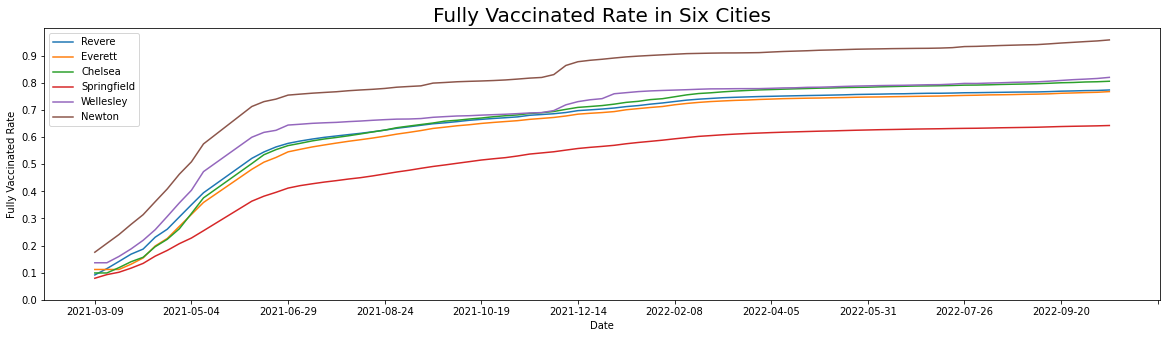

In [5]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)




plt.plot(all_age_Revere["date"],all_age_Revere["fully_vaccinated"]/all_age_Revere["population"].iat[-1], label='Revere')
plt.plot(all_age_Everett["date"],all_age_Everett["fully_vaccinated"]/all_age_Everett["population"].iat[-1], label='Everett')
plt.plot(all_age_Chelsea["date"],all_age_Chelsea["fully_vaccinated"]/all_age_Chelsea["population"].iat[-1], label='Chelsea')
plt.plot(all_age_Springfield["date"],all_age_Springfield["fully_vaccinated"]/all_age_Springfield["population"].iat[-1], label='Springfield')
plt.plot(all_age_Wellesley["date"],all_age_Wellesley["fully_vaccinated"]/all_age_Wellesley["population"].iat[-1], label='Wellesley')
plt.plot(all_age_Newton["date"],all_age_Newton["fully_vaccinated"]/all_age_Newton["population"].iat[-1], label='Newton')

plt.title('Fully Vaccinated Rate in Six Cities', fontsize=20)
plt.xlabel('Date')
plt.ylabel('Fully Vaccinated Rate')

plt.yticks(np.arange(0, 1, 0.1))
plt.xticks(np.arange(0, 90, 8))
plt.legend()
plt.show()


In [ ]:
#Age 0 - 19
#Combine Age 20 - 29 and Age 30 - 49
#Age 50 - 65
#Combine Age 65 - 74 and Age 75+



In [ ]:
#Combine Age 20 - 29 and Age 30 - 49 in Wellesley
frames = [age20_Wellesley, age30_Wellesley]
result = pd.concat(frames)
age20_49Wellesley=pd.DataFrame(result.groupby('date')['population'].sum())
age20_49Wellesley["age_group"] = "20-49 Years"
age20_49Wellesley["city"] = "Wellesley"
age20_49Wellesley2=pd.DataFrame(result.groupby('date')['atleast_onedose'].sum())
age20_49Wellesley['atleast_onedose']=age20_49Wellesley2['atleast_onedose']
age20_49Wellesley3=pd.DataFrame(result.groupby('date')['fully_vaccinated'].sum())
age20_49Wellesley['fully_vaccinated']=age20_49Wellesley3['fully_vaccinated']

#Combine Age 65 - 74 and Age 75+ in Wellesley
frames = [age65_Wellesley, age75_Wellesley]
result = pd.concat(frames)
age65_75Wellesley=pd.DataFrame(result.groupby('date')['population'].sum())
age65_75Wellesley["age_group"] = "65-75+ Years"
age65_75Wellesley["city"] = "Wellesley"
age65_75Wellesley2=pd.DataFrame(result.groupby('date')['atleast_onedose'].sum())
age65_75Wellesley['atleast_onedose']=age65_75Wellesley2['atleast_onedose']
age65_75Wellesley3=pd.DataFrame(result.groupby('date')['fully_vaccinated'].sum())
age65_75Wellesley['fully_vaccinated']=age65_75Wellesley3['fully_vaccinated']


#Combine Age 20 - 29 and Age 30 - 49 in Revere
frames = [age20_Revere, age30_Revere]
result = pd.concat(frames)
age20_49Revere=pd.DataFrame(result.groupby('date')['population'].sum())
age20_49Revere["age_group"] = "20-49 Years"
age20_49Revere["city"] = "Revere"
age20_49Revere2=pd.DataFrame(result.groupby('date')['atleast_onedose'].sum())
age20_49Revere['atleast_onedose']=age20_49Revere2['atleast_onedose']
age20_49Revere3=pd.DataFrame(result.groupby('date')['fully_vaccinated'].sum())
age20_49Revere['fully_vaccinated']=age20_49Revere3['fully_vaccinated']

#Combine Age 65 - 74 and Age 75+ in Revere
frames = [age65_Revere, age75_Revere]
result = pd.concat(frames)
age65_75Revere=pd.DataFrame(result.groupby('date')['population'].sum())
age65_75Revere["age_group"] = "65-75+ Years"
age65_75Revere["city"] = "Revere"
age65_75Revere2=pd.DataFrame(result.groupby('date')['atleast_onedose'].sum())
age65_75Revere['atleast_onedose']=age65_75Revere2['atleast_onedose']
age65_75Revere3=pd.DataFrame(result.groupby('date')['fully_vaccinated'].sum())
age65_75Revere['fully_vaccinated']=age65_75Revere3['fully_vaccinated']



#Combine Age 20 - 29 and Age 30 - 49 in Chelsea
frames = [age20_Chelsea, age30_Chelsea]
result = pd.concat(frames)
age20_49Chelsea=pd.DataFrame(result.groupby('date')['population'].sum())
age20_49Chelsea["age_group"] = "20-49 Years"
age20_49Chelsea["city"] = "Chelsea"
age20_49Chelsea2=pd.DataFrame(result.groupby('date')['atleast_onedose'].sum())
age20_49Chelsea['atleast_onedose']=age20_49Chelsea2['atleast_onedose']
age20_49Chelsea3=pd.DataFrame(result.groupby('date')['fully_vaccinated'].sum())
age20_49Chelsea['fully_vaccinated']=age20_49Chelsea3['fully_vaccinated']

#Combine Age 65 - 74 and Age 75+ in Chelsea
frames = [age65_Chelsea, age75_Chelsea]
result = pd.concat(frames)
age65_75Chelsea=pd.DataFrame(result.groupby('date')['population'].sum())
age65_75Chelsea["age_group"] = "65-75+ Years"
age65_75Chelsea["city"] = "Chelsea"
age65_75Chelsea2=pd.DataFrame(result.groupby('date')['atleast_onedose'].sum())
age65_75Chelsea['atleast_onedose']=age65_75Chelsea2['atleast_onedose']
age65_75Chelsea3=pd.DataFrame(result.groupby('date')['fully_vaccinated'].sum())
age65_75Chelsea['fully_vaccinated']=age65_75Chelsea3['fully_vaccinated']


#Combine Age 20 - 29 and Age 30 - 49 in Springfield
frames = [age20_Springfield, age30_Springfield]
result = pd.concat(frames)
age20_49Springfield=pd.DataFrame(result.groupby('date')['population'].sum())
age20_49Springfield["age_group"] = "20-49 Years"
age20_49Springfield["city"] = "Springfield"
age20_49Springfield2=pd.DataFrame(result.groupby('date')['atleast_onedose'].sum())
age20_49Springfield['atleast_onedose']=age20_49Springfield2['atleast_onedose']
age20_49Springfield3=pd.DataFrame(result.groupby('date')['fully_vaccinated'].sum())
age20_49Springfield['fully_vaccinated']=age20_49Springfield3['fully_vaccinated']

#Combine Age 65 - 74 and Age 75+ in Springfield
frames = [age65_Springfield, age75_Springfield]
result = pd.concat(frames)
age65_75Springfield=pd.DataFrame(result.groupby('date')['population'].sum())
age65_75Springfield["age_group"] = "65-75+ Years"
age65_75Springfield["city"] = "Springfield"
age65_75Springfield2=pd.DataFrame(result.groupby('date')['atleast_onedose'].sum())
age65_75Springfield['atleast_onedose']=age65_75Springfield2['atleast_onedose']
age65_75Springfield3=pd.DataFrame(result.groupby('date')['fully_vaccinated'].sum())
age65_75Springfield['fully_vaccinated']=age65_75Springfield3['fully_vaccinated']

#Combine Age 20 - 29 and Age 30 - 49 in Newton
frames = [age20_Newton, age30_Newton]
result = pd.concat(frames)
age20_49Newton=pd.DataFrame(result.groupby('date')['population'].sum())
age20_49Newton["age_group"] = "20-49 Years"
age20_49Newton["city"] = "Newton"
age20_49Newton2=pd.DataFrame(result.groupby('date')['atleast_onedose'].sum())
age20_49Newton['atleast_onedose']=age20_49Newton2['atleast_onedose']
age20_49Newton3=pd.DataFrame(result.groupby('date')['fully_vaccinated'].sum())
age20_49Newton['fully_vaccinated']=age20_49Newton3['fully_vaccinated']

#Combine Age 65 - 74 and Age 75+ in Newton
frames = [age65_Newton, age75_Newton]
result = pd.concat(frames)
age65_75Newton=pd.DataFrame(result.groupby('date')['population'].sum())
age65_75Newton["age_group"] = "65-75+ Years"
age65_75Newton["city"] = "Newton"
age65_75Newton2=pd.DataFrame(result.groupby('date')['atleast_onedose'].sum())
age65_75Newton['atleast_onedose']=age65_75Newton2['atleast_onedose']
age65_75Newton3=pd.DataFrame(result.groupby('date')['fully_vaccinated'].sum())
age65_75Newton['fully_vaccinated']=age65_75Newton3['fully_vaccinated']

#Combine Age 20 - 29 and Age 30 - 49 in Everett
frames = [age20_Everett, age30_Everett]
result = pd.concat(frames)
age20_49Everett=pd.DataFrame(result.groupby('date')['population'].sum())
age20_49Everett["age_group"] = "20-49 Years"
age20_49Everett["city"] = "Everett"
age20_49Everett2=pd.DataFrame(result.groupby('date')['atleast_onedose'].sum())
age20_49Everett['atleast_onedose']=age20_49Everett2['atleast_onedose']
age20_49Everett3=pd.DataFrame(result.groupby('date')['fully_vaccinated'].sum())
age20_49Everett['fully_vaccinated']=age20_49Everett3['fully_vaccinated']

#Combine Age 65 - 74 and Age 75+ in Everett
frames = [age65_Everett, age75_Everett]
result = pd.concat(frames)
age65_75Everett=pd.DataFrame(result.groupby('date')['population'].sum())
age65_75Everett["age_group"] = "65-75+ Years"
age65_75Everett["city"] = "Everett"
age65_75Everett2=pd.DataFrame(result.groupby('date')['atleast_onedose'].sum())
age65_75Everett['atleast_onedose']=age65_75Everett2['atleast_onedose']
age65_75Everett3=pd.DataFrame(result.groupby('date')['fully_vaccinated'].sum())
age65_75Everett['fully_vaccinated']=age65_75Everett3['fully_vaccinated']


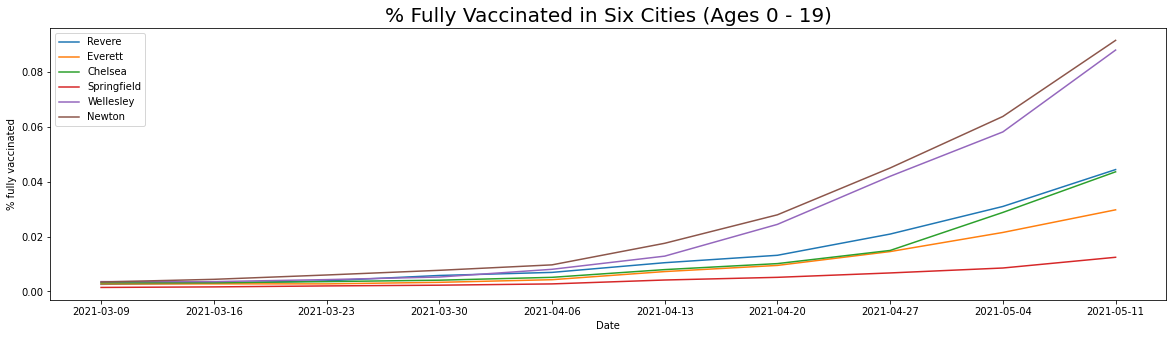

In [ ]:
import matplotlib.pyplot as plt

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)

plt.plot(age0_Revere["date"],age0_Revere["fully_vaccinated"]/age0_Revere["population"].iat[-1], label='Revere')
plt.plot(age0_Everett["date"],age0_Everett["fully_vaccinated"]/age0_Everett["population"].iat[-1], label='Everett')
plt.plot(age0_Chelsea["date"],age0_Chelsea["fully_vaccinated"]/age0_Chelsea["population"].iat[-1], label='Chelsea')
plt.plot(age0_Springfield["date"],age0_Springfield["fully_vaccinated"]/age0_Springfield["population"].iat[-1], label='Springfield')
plt.plot(age0_Wellesley["date"],age0_Wellesley["fully_vaccinated"]/age0_Wellesley["population"].iat[-1], label='Wellesley')
plt.plot(age0_Newton["date"],age0_Newton["fully_vaccinated"]/age0_Newton["population"].iat[-1], label='Newton')

plt.title('% Fully Vaccinated in Six Cities (Ages 0 - 19)', fontsize=20)
plt.xlabel('Date')
plt.ylabel('% fully vaccinated')

plt.legend()
plt.show()

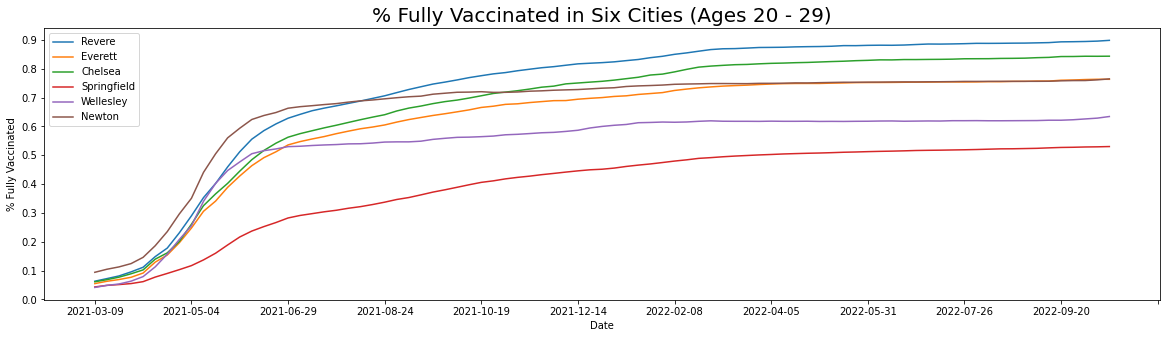

In [ ]:
import matplotlib.pyplot as plt

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)

plt.plot(age20_Revere["date"],age20_Revere["fully_vaccinated"]/age20_Revere["population"].iat[-1], label='Revere')
plt.plot(age20_Everett["date"],age20_Everett["fully_vaccinated"]/age20_Everett["population"].iat[-1], label='Everett')
plt.plot(age20_Chelsea["date"],age20_Chelsea["fully_vaccinated"]/age20_Chelsea["population"].iat[-1], label='Chelsea')
plt.plot(age20_Springfield["date"],age20_Springfield["fully_vaccinated"]/age20_Springfield["population"].iat[-1], label='Springfield')
plt.plot(age20_Wellesley["date"],age20_Wellesley["fully_vaccinated"]/age20_Wellesley["population"].iat[-1], label='Wellesley')
plt.plot(age20_Newton["date"],age20_Newton["fully_vaccinated"]/age20_Newton["population"].iat[-1], label='Newton')

plt.title('% Fully Vaccinated in Six Cities (Ages 20 - 29)', fontsize=20)
plt.xlabel('Date')
plt.ylabel('% Fully Vaccinated')
plt.yticks(np.arange(0, 1, 0.1))
plt.xticks(np.arange(0, 90, 8))

plt.legend()
plt.show()

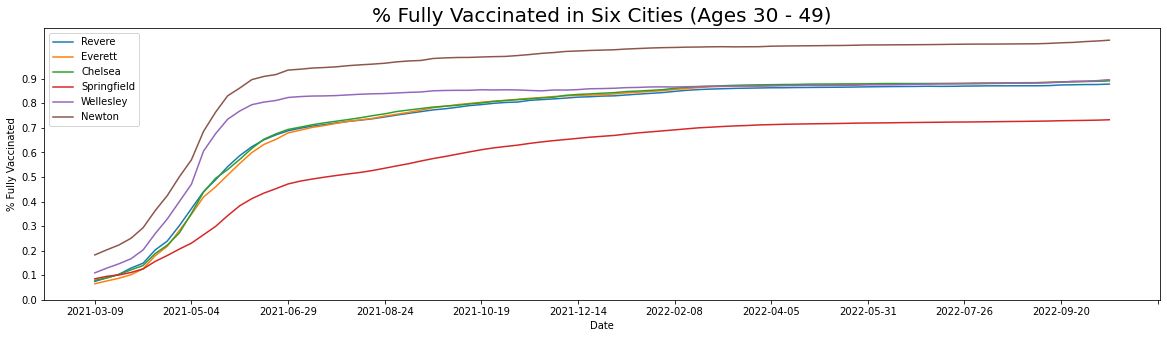

In [ ]:
import matplotlib.pyplot as plt

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)

plt.plot(age30_Revere["date"],age30_Revere["fully_vaccinated"]/age30_Revere["population"].iat[-1], label='Revere')
plt.plot(age30_Everett["date"],age30_Everett["fully_vaccinated"]/age30_Everett["population"].iat[-1], label='Everett')
plt.plot(age30_Chelsea["date"],age30_Chelsea["fully_vaccinated"]/age30_Chelsea["population"].iat[-1], label='Chelsea')
plt.plot(age30_Springfield["date"],age30_Springfield["fully_vaccinated"]/age30_Springfield["population"].iat[-1], label='Springfield')
plt.plot(age30_Wellesley["date"],age30_Wellesley["fully_vaccinated"]/age30_Wellesley["population"].iat[-1], label='Wellesley')
plt.plot(age30_Newton["date"],age30_Newton["fully_vaccinated"]/age30_Newton["population"].iat[-1], label='Newton')

plt.title('% Fully Vaccinated in Six Cities (Ages 30 - 49)', fontsize=20)
plt.xlabel('Date')
plt.ylabel('% Fully Vaccinated')

plt.yticks(np.arange(0, 1, 0.1))
plt.xticks(np.arange(0, 90, 8))
plt.legend()
plt.show()

In [ ]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)

plt.plot(age20_49Revere.index,age20_49Revere["fully_vaccinated"]/age20_49Revere["population"].iat[-1], label='Revere')
plt.plot(age20_49Everett.index,age20_49Everett["fully_vaccinated"]/age20_49Everett["population"].iat[-1], label='Everett')
plt.plot(age20_49Chelsea.index,age20_49Chelsea["fully_vaccinated"]/age20_49Chelsea["population"].iat[-1], label='Chelsea')
plt.plot(age20_49Springfield.index,age20_49Springfield["fully_vaccinated"]/age20_49Springfield["population"].iat[-1], label='Springfield')
plt.plot(age20_49Wellesley.index,age20_49Wellesley["fully_vaccinated"]/age20_49Wellesley["population"].iat[-1], label='Wellesley')
plt.plot(age20_49Newton.index,age20_49Newton["fully_vaccinated"]/age20_49Newton["population"].iat[-1], label='Newton')

plt.title('Fully Vaccinated Rate in Six Cities in Age 20 - 49 Range', fontsize=20)
plt.xlabel('Date')
plt.ylabel('Fully Vaccinated Rate')

plt.xticks(rotation='vertical') 

plt.legend()
plt.show()

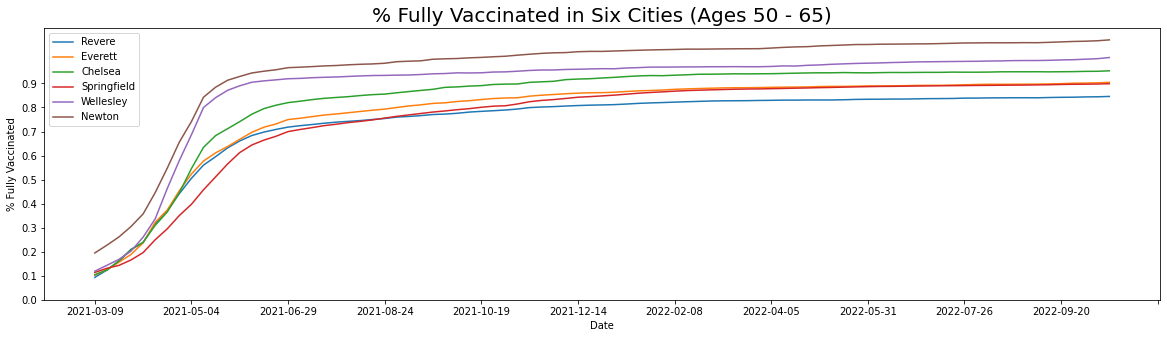

In [ ]:

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)

plt.plot(age50_Revere["date"],age50_Revere["fully_vaccinated"]/age50_Revere["population"].iat[-1], label='Revere')
plt.plot(age50_Everett["date"],age50_Everett["fully_vaccinated"]/age50_Everett["population"].iat[-1], label='Everett')
plt.plot(age50_Chelsea["date"],age50_Chelsea["fully_vaccinated"]/age50_Chelsea["population"].iat[-1], label='Chelsea')
plt.plot(age50_Springfield["date"],age50_Springfield["fully_vaccinated"]/age50_Springfield["population"].iat[-1], label='Springfield')
plt.plot(age50_Wellesley["date"],age50_Wellesley["fully_vaccinated"]/age50_Wellesley["population"].iat[-1], label='Wellesley')
plt.plot(age50_Newton["date"],age50_Newton["fully_vaccinated"]/age50_Newton["population"].iat[-1], label='Newton')

plt.title('% Fully Vaccinated in Six Cities (Ages 50 - 65)', fontsize=20)
plt.xlabel('Date')
plt.ylabel('% Fully Vaccinated')

plt.yticks(np.arange(0, 1, 0.1))
plt.xticks(np.arange(0, 90, 8))
plt.legend()
plt.show()

In [ ]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)

plt.plot(age65_75Revere.index,age65_75Revere["fully_vaccinated"]/age65_75Revere["population"].iat[-1], label='Revere')
plt.plot(age65_75Everett.index,age65_75Everett["fully_vaccinated"]/age65_75Everett["population"].iat[-1], label='Everett')
plt.plot(age65_75Chelsea.index,age65_75Chelsea["fully_vaccinated"]/age65_75Chelsea["population"].iat[-1], label='Chelsea')
plt.plot(age65_75Springfield.index,age65_75Springfield["fully_vaccinated"]/age65_75Springfield["population"].iat[-1], label='Springfield')
plt.plot(age65_75Wellesley.index,age65_75Wellesley["fully_vaccinated"]/age65_75Wellesley["population"].iat[-1], label='Wellesley')
plt.plot(age65_75Newton.index,age65_75Newton["fully_vaccinated"]/age65_75Newton["population"].iat[-1], label='Newton')

plt.title('Fully Vaccinated Rate in Six Cities in Age 65 - 75+ Range', fontsize=20)
plt.xlabel('Date')
plt.ylabel('Fully Vaccinated Rate')

plt.xticks(rotation='vertical') 

plt.legend()
plt.show()

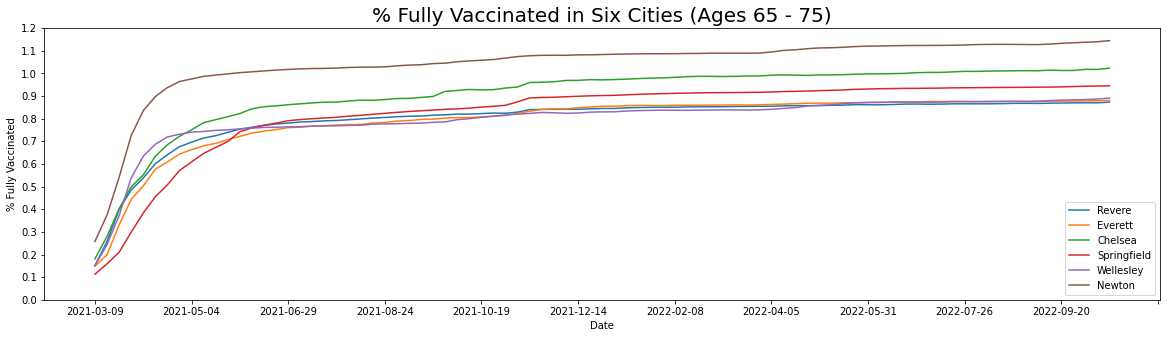

In [ ]:
import matplotlib.pyplot as plt

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)

plt.plot(age65_Revere["date"],age65_Revere["fully_vaccinated"]/age65_Revere["population"].iat[-1], label='Revere')
plt.plot(age65_Everett["date"],age65_Everett["fully_vaccinated"]/age65_Everett["population"].iat[-1], label='Everett')
plt.plot(age65_Chelsea["date"],age65_Chelsea["fully_vaccinated"]/age65_Chelsea["population"].iat[-1], label='Chelsea')
plt.plot(age65_Springfield["date"],age65_Springfield["fully_vaccinated"]/age65_Springfield["population"].iat[-1], label='Springfield')
plt.plot(age65_Wellesley["date"],age65_Wellesley["fully_vaccinated"]/age65_Wellesley["population"].iat[-1], label='Wellesley')
plt.plot(age65_Newton["date"],age65_Newton["fully_vaccinated"]/age65_Newton["population"].iat[-1], label='Newton')

plt.title('% Fully Vaccinated in Six Cities (Ages 65 - 75)', fontsize=20)
plt.xlabel('Date')
plt.ylabel('% Fully Vaccinated')

plt.yticks(np.arange(0, 1.3, 0.1))
plt.xticks(np.arange(0, 90, 8))
plt.legend()
plt.show()

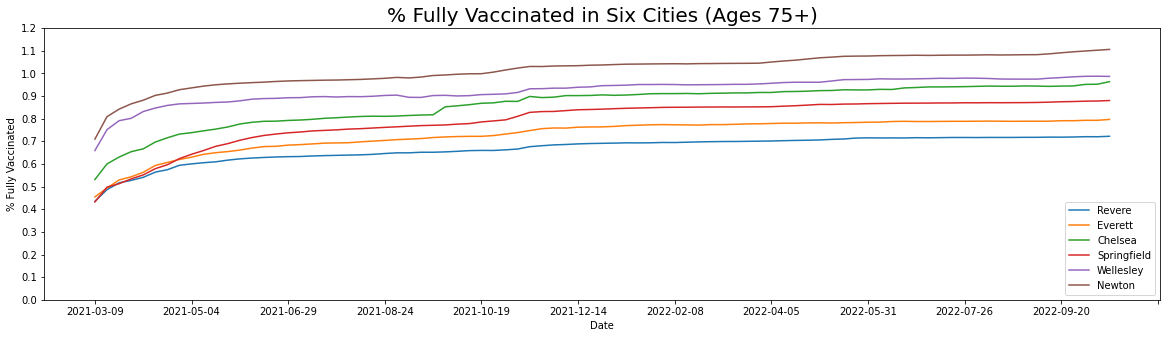

In [ ]:
import matplotlib.pyplot as plt

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)

plt.plot(age75_Revere["date"],age75_Revere["fully_vaccinated"]/age75_Revere["population"].iat[-1], label='Revere')
plt.plot(age75_Everett["date"],age75_Everett["fully_vaccinated"]/age75_Everett["population"].iat[-1], label='Everett')
plt.plot(age75_Chelsea["date"],age75_Chelsea["fully_vaccinated"]/age75_Chelsea["population"].iat[-1], label='Chelsea')
plt.plot(age75_Springfield["date"],age75_Springfield["fully_vaccinated"]/age75_Springfield["population"].iat[-1], label='Springfield')
plt.plot(age75_Wellesley["date"],age75_Wellesley["fully_vaccinated"]/age75_Wellesley["population"].iat[-1], label='Wellesley')
plt.plot(age75_Newton["date"],age75_Newton["fully_vaccinated"]/age75_Newton["population"].iat[-1], label='Newton')

plt.title('% Fully Vaccinated in Six Cities (Ages 75+)', fontsize=20)
plt.xlabel('Date')
plt.ylabel('% Fully Vaccinated')

plt.yticks(np.arange(0, 1.3, 0.1))
plt.xticks(np.arange(0, 90, 8))
plt.legend()
plt.show()

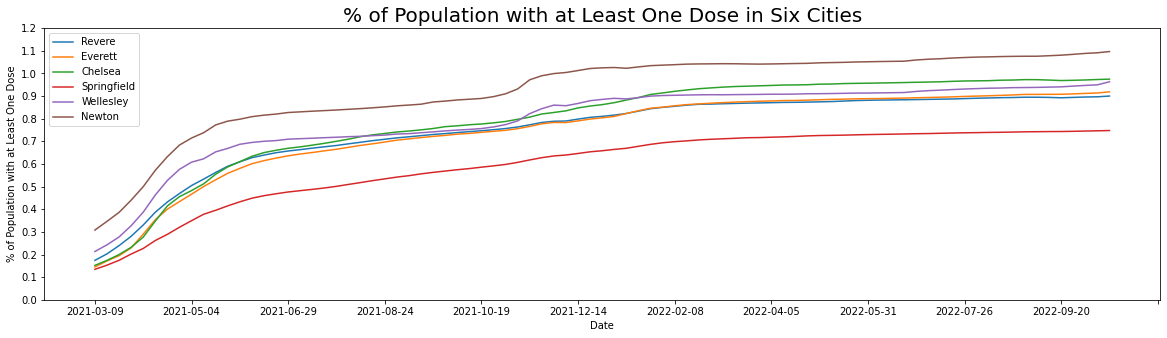

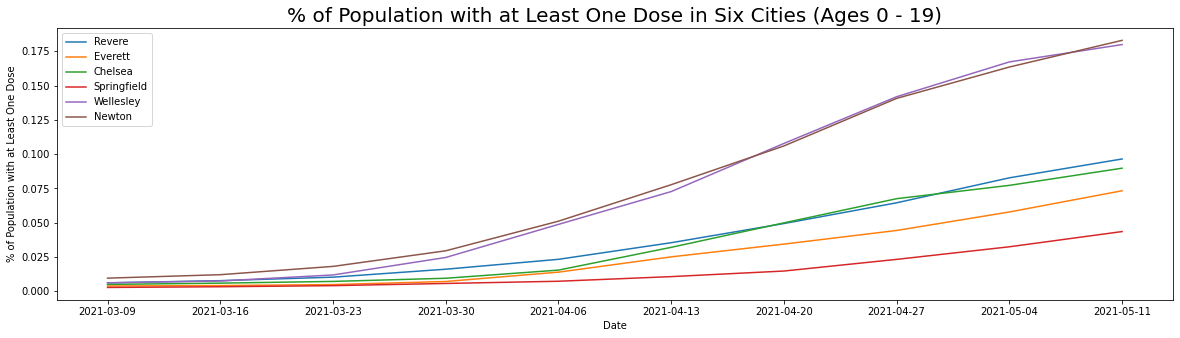

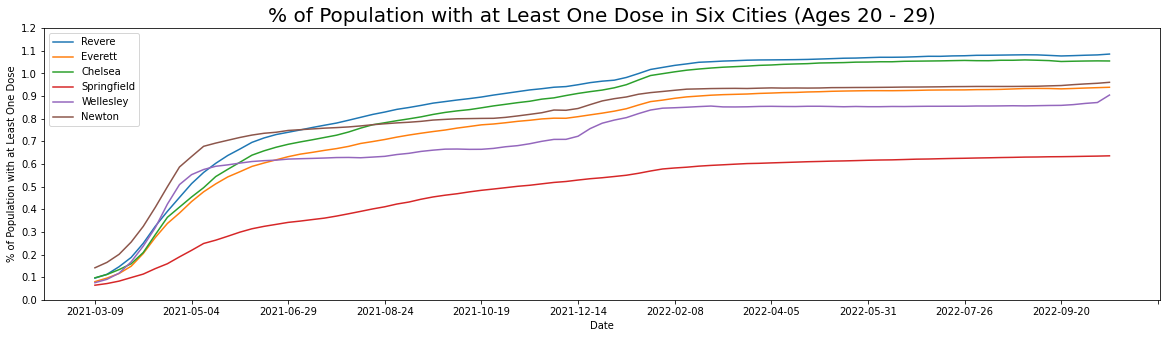

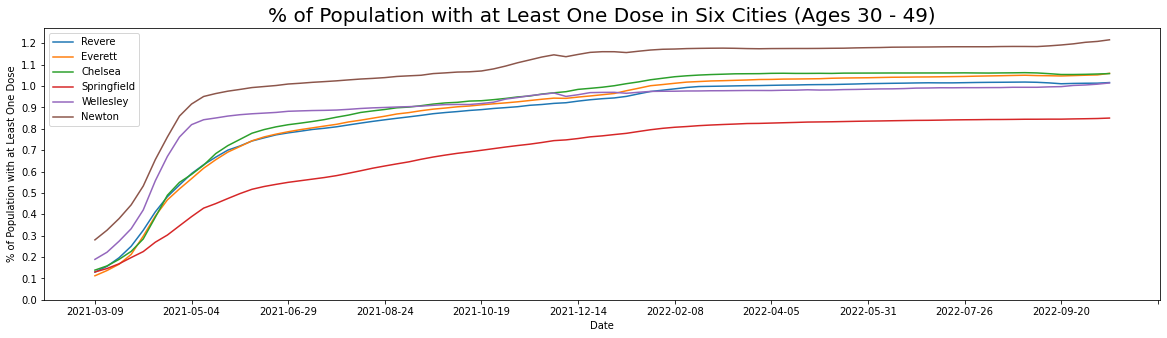

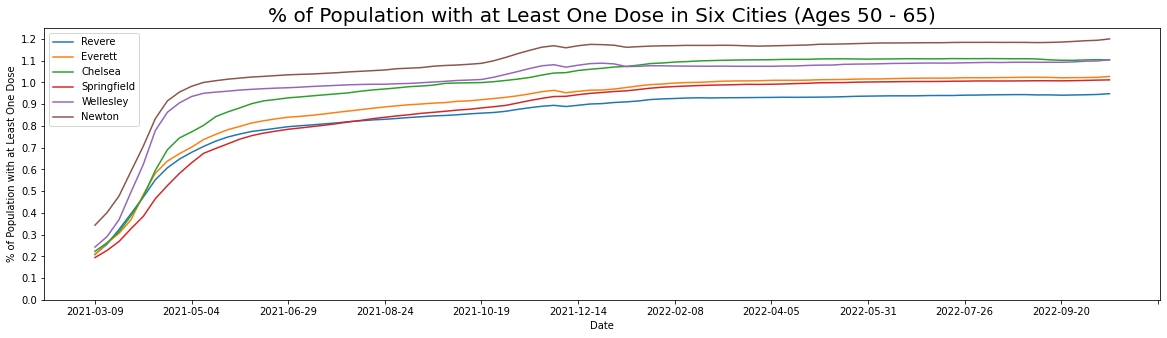

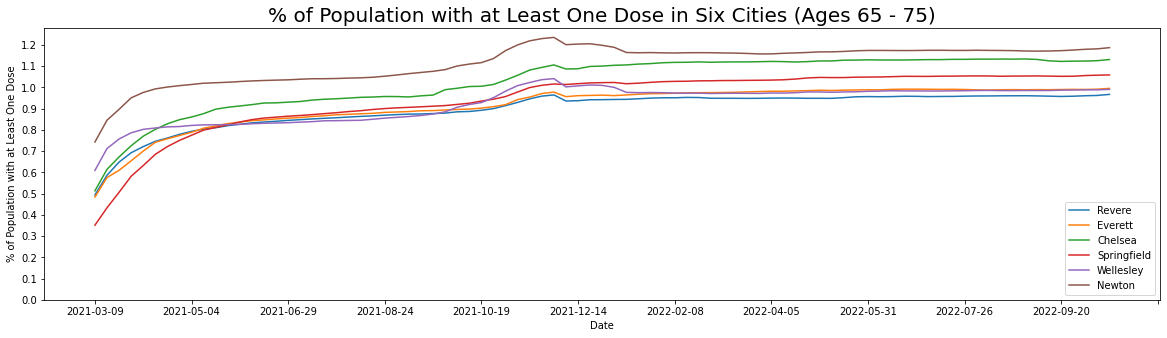

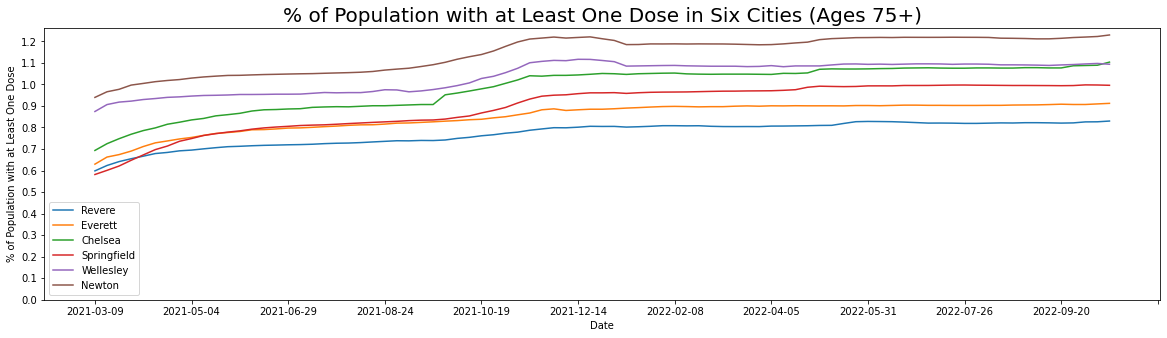

In [6]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)




plt.plot(all_age_Revere["date"],all_age_Revere["atleast_onedose"]/all_age_Revere["population"].iat[-1], label='Revere')
plt.plot(all_age_Everett["date"],all_age_Everett["atleast_onedose"]/all_age_Everett["population"].iat[-1], label='Everett')
plt.plot(all_age_Chelsea["date"],all_age_Chelsea["atleast_onedose"]/all_age_Chelsea["population"].iat[-1], label='Chelsea')
plt.plot(all_age_Springfield["date"],all_age_Springfield["atleast_onedose"]/all_age_Springfield["population"].iat[-1], label='Springfield')
plt.plot(all_age_Wellesley["date"],all_age_Wellesley["atleast_onedose"]/all_age_Wellesley["population"].iat[-1], label='Wellesley')
plt.plot(all_age_Newton["date"],all_age_Newton["atleast_onedose"]/all_age_Newton["population"].iat[-1], label='Newton')

plt.title('% of Population with at Least One Dose in Six Cities', fontsize=20)
plt.xlabel('Date')
plt.ylabel('% of Population with at Least One Dose')

plt.yticks(np.arange(0, 1.3, 0.1))
plt.xticks(np.arange(0, 90, 8))
plt.legend()
plt.show()




f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)

plt.plot(age0_Revere["date"],age0_Revere["atleast_onedose"]/age0_Revere["population"].iat[-1], label='Revere')
plt.plot(age0_Everett["date"],age0_Everett["atleast_onedose"]/age0_Everett["population"].iat[-1], label='Everett')
plt.plot(age0_Chelsea["date"],age0_Chelsea["atleast_onedose"]/age0_Chelsea["population"].iat[-1], label='Chelsea')
plt.plot(age0_Springfield["date"],age0_Springfield["atleast_onedose"]/age0_Springfield["population"].iat[-1], label='Springfield')
plt.plot(age0_Wellesley["date"],age0_Wellesley["atleast_onedose"]/age0_Wellesley["population"].iat[-1], label='Wellesley')
plt.plot(age0_Newton["date"],age0_Newton["atleast_onedose"]/age0_Newton["population"].iat[-1], label='Newton')

plt.title('% of Population with at Least One Dose in Six Cities (Ages 0 - 19)', fontsize=20)
plt.xlabel('Date')
plt.ylabel('% of Population with at Least One Dose')

plt.legend()
plt.show()

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)

plt.plot(age20_Revere["date"],age20_Revere["atleast_onedose"]/age20_Revere["population"].iat[-1], label='Revere')
plt.plot(age20_Everett["date"],age20_Everett["atleast_onedose"]/age20_Everett["population"].iat[-1], label='Everett')
plt.plot(age20_Chelsea["date"],age20_Chelsea["atleast_onedose"]/age20_Chelsea["population"].iat[-1], label='Chelsea')
plt.plot(age20_Springfield["date"],age20_Springfield["atleast_onedose"]/age20_Springfield["population"].iat[-1], label='Springfield')
plt.plot(age20_Wellesley["date"],age20_Wellesley["atleast_onedose"]/age20_Wellesley["population"].iat[-1], label='Wellesley')
plt.plot(age20_Newton["date"],age20_Newton["atleast_onedose"]/age20_Newton["population"].iat[-1], label='Newton')

plt.title('% of Population with at Least One Dose in Six Cities (Ages 20 - 29)', fontsize=20)
plt.xlabel('Date')
plt.ylabel('% of Population with at Least One Dose')
plt.yticks(np.arange(0, 1.3, 0.1))
plt.xticks(np.arange(0, 90, 8))

plt.legend()
plt.show()
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)

plt.plot(age30_Revere["date"],age30_Revere["atleast_onedose"]/age30_Revere["population"].iat[-1], label='Revere')
plt.plot(age30_Everett["date"],age30_Everett["atleast_onedose"]/age30_Everett["population"].iat[-1], label='Everett')
plt.plot(age30_Chelsea["date"],age30_Chelsea["atleast_onedose"]/age30_Chelsea["population"].iat[-1], label='Chelsea')
plt.plot(age30_Springfield["date"],age30_Springfield["atleast_onedose"]/age30_Springfield["population"].iat[-1], label='Springfield')
plt.plot(age30_Wellesley["date"],age30_Wellesley["atleast_onedose"]/age30_Wellesley["population"].iat[-1], label='Wellesley')
plt.plot(age30_Newton["date"],age30_Newton["atleast_onedose"]/age30_Newton["population"].iat[-1], label='Newton')

plt.title('% of Population with at Least One Dose in Six Cities (Ages 30 - 49)', fontsize=20)
plt.xlabel('Date')
plt.ylabel('% of Population with at Least One Dose')
plt.yticks(np.arange(0, 1.3, 0.1))
plt.xticks(np.arange(0, 90, 8))

plt.legend()
plt.show()


f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)

plt.plot(age50_Revere["date"],age50_Revere["atleast_onedose"]/age50_Revere["population"].iat[-1], label='Revere')
plt.plot(age50_Everett["date"],age50_Everett["atleast_onedose"]/age50_Everett["population"].iat[-1], label='Everett')
plt.plot(age50_Chelsea["date"],age50_Chelsea["atleast_onedose"]/age50_Chelsea["population"].iat[-1], label='Chelsea')
plt.plot(age50_Springfield["date"],age50_Springfield["atleast_onedose"]/age50_Springfield["population"].iat[-1], label='Springfield')
plt.plot(age50_Wellesley["date"],age50_Wellesley["atleast_onedose"]/age50_Wellesley["population"].iat[-1], label='Wellesley')
plt.plot(age50_Newton["date"],age50_Newton["atleast_onedose"]/age50_Newton["population"].iat[-1], label='Newton')

plt.title('% of Population with at Least One Dose in Six Cities (Ages 50 - 65)', fontsize=20)
plt.xlabel('Date')
plt.ylabel('% of Population with at Least One Dose')

plt.yticks(np.arange(0, 1.3, 0.1))
plt.xticks(np.arange(0, 90, 8))
plt.legend()
plt.show()


f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)

plt.plot(age65_Revere["date"],age65_Revere["atleast_onedose"]/age65_Revere["population"].iat[-1], label='Revere')
plt.plot(age65_Everett["date"],age65_Everett["atleast_onedose"]/age65_Everett["population"].iat[-1], label='Everett')
plt.plot(age65_Chelsea["date"],age65_Chelsea["atleast_onedose"]/age65_Chelsea["population"].iat[-1], label='Chelsea')
plt.plot(age65_Springfield["date"],age65_Springfield["atleast_onedose"]/age65_Springfield["population"].iat[-1], label='Springfield')
plt.plot(age65_Wellesley["date"],age65_Wellesley["atleast_onedose"]/age65_Wellesley["population"].iat[-1], label='Wellesley')
plt.plot(age65_Newton["date"],age65_Newton["atleast_onedose"]/9938, label='Newton')

plt.title('% of Population with at Least One Dose in Six Cities (Ages 65 - 75)', fontsize=20)
plt.xlabel('Date')
plt.ylabel('% of Population with at Least One Dose')

plt.yticks(np.arange(0, 1.3, 0.1))
plt.xticks(np.arange(0, 90, 8))
plt.legend()
plt.show()
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)

plt.plot(age75_Revere["date"],age75_Revere["atleast_onedose"]/age75_Revere["population"].iat[-1], label='Revere')
plt.plot(age75_Everett["date"],age75_Everett["atleast_onedose"]/age75_Everett["population"].iat[-1], label='Everett')
plt.plot(age75_Chelsea["date"],age75_Chelsea["atleast_onedose"]/age75_Chelsea["population"].iat[-1], label='Chelsea')
plt.plot(age75_Springfield["date"],age75_Springfield["atleast_onedose"]/age75_Springfield["population"].iat[-1], label='Springfield')
plt.plot(age75_Wellesley["date"],age75_Wellesley["atleast_onedose"]/age75_Wellesley["population"].iat[-1], label='Wellesley')
plt.plot(age75_Newton["date"],age75_Newton["atleast_onedose"]/age75_Newton["population"].iat[-1], label='Newton')

plt.title('% of Population with at Least One Dose in Six Cities (Ages 75+)', fontsize=20)
plt.xlabel('Date')
plt.ylabel('% of Population with at Least One Dose')

plt.yticks(np.arange(0, 1.3, 0.1))
plt.xticks(np.arange(0, 90, 8))
plt.legend()
plt.show()

#*Cleaning Zipcode Table*

In [ ]:
six_city2 = zipdf.copy()
search = SearchEngine()
def zco(x):
    if(x != 'Unspecified'):
      city = search.by_zipcode(x).city
      return city if city else None
    return 'Unspecified'

six_city2['zipcode'] = six_city2['zipcode'].apply(zco)

six_city2 = six_city2.rename(columns={'zipcode': 'city'})

Revere2 = six_city2.loc[six_city2["city"]=="Revere"]
Revere2 = Revere2.drop(['city'], axis=1)

Chelsea2 = six_city2.loc[six_city2['city'] == 'Chelsea']
Chelsea2 = Chelsea2.drop(['city'], axis=1)

Springfield2 = six_city2.loc[six_city2["city"]=="Springfield"]
Springfield2 = Springfield2.drop(['city'], axis=1)

Everett2 = six_city2.loc[six_city2["city"]=="Everett"]
Everett2 = Everett2.drop(['city'], axis=1)

Newton2 = six_city2.loc[six_city2["city"]=="Newton"]
Newton2 = Newton2.drop(['city'], axis=1)

Wellesley2 = six_city2.loc[six_city2["city"]=="Wellesley"]
Wellesley2 = Wellesley2.drop(['city'], axis=1)

#Interpolate Data
fully_cols = [col for col in Revere2.columns if 'fully' in col or 'date' in col]
Revere2 = Revere2[fully_cols]
Revere2 = Revere2.interpolate(method ='linear', limit_direction ='both')
Revere2 = Revere2.groupby(pd.PeriodIndex(Revere2['date'], freq="M"))[[col for col in Revere2.columns if 'fully' in col in col]].mean()
# Revere2 = Revere2.dropna(axis = 1, thresh = Revere2.shape[0] - (Revere2.shape[0] * 0.5))

fully_cols = [col for col in Chelsea2.columns if 'fully' in col or 'date' in col]
Chelsea2 = Chelsea2[fully_cols]
Chelsea2 = Chelsea2.interpolate(method ='linear', limit_direction ='both')
Chelsea2 = Chelsea2.groupby(pd.PeriodIndex(Chelsea2['date'], freq="M"))[[col for col in Chelsea2.columns if 'fully' in col in col]].mean()
# Chelsea2 = Chelsea2.dropna(axis = 1, thresh = Chelsea2.shape[0] - (Chelsea2.shape[0] * 0.5))

fully_cols = [col for col in Springfield2.columns if 'fully' in col or 'date' in col]
Springfield2 = Springfield2[fully_cols]
Springfield2 = Springfield2.interpolate(method ='linear', limit_direction ='both')
Springfield2 = Springfield2.groupby(pd.PeriodIndex(Springfield2['date'], freq="M"))[[col for col in Springfield2.columns if 'fully' in col in col]].mean()
# Springfield2 = Springfield2.dropna(axis = 1, thresh = Springfield2.shape[0] - (Springfield2.shape[0] * 0.5))

fully_cols = [col for col in Everett2.columns if 'fully' in col or 'date' in col]
Everett2 = Everett2[fully_cols]
Everett2 = Everett2.interpolate(method ='linear', limit_direction ='both')
Everett2 = Everett2.groupby(pd.PeriodIndex(Everett2['date'], freq="M"))[[col for col in Everett2.columns if 'fully' in col in col]].mean()
# Everett2 = Everett2.dropna(axis = 1, thresh = Everett2.shape[0] - (Everett2.shape[0] * 0.5))

fully_cols = [col for col in Newton2.columns if 'fully' in col or 'date' in col]
Newton2 = Newton2[fully_cols]
Newton2 = Newton2.interpolate(method ='linear', limit_direction ='both')
Newton2 = Newton2.groupby(pd.PeriodIndex(Newton2['date'], freq="M"))[[col for col in Newton2.columns if 'fully' in col in col]].mean()
# Newton2 = Newton2.dropna(axis = 1, thresh = Newton2.shape[0] - (Newton2.shape[0] * 0.5))

fully_cols = [col for col in Wellesley2.columns if 'fully' in col or 'date' in col]
Wellesley2 = Wellesley2[fully_cols]
Wellesley2 = Wellesley2.interpolate(method ='linear', limit_direction ='both')
Wellesley2 = Wellesley2.groupby(pd.PeriodIndex(Wellesley2['date'], freq="M"))[[col for col in Wellesley2.columns if 'fully' in col in col]].mean()
# Wellesley2 = Wellesley2.dropna(axis = 1, thresh = Wellesley2.shape[0] - (Wellesley2.shape[0] * 0.5))


#*Random Forest Classification*

Let's look at how each component matters in the understanding of vaccination rates per city

In [ ]:
#Attempt to predict missing values
six_city2 = six_city2.interpolate(method ='linear', limit_direction ='both')
sc = six_city2.copy()

#Normalize the data
m = MinMaxScaler()
y = sc['city']
X = sc.drop(['city','date'],axis=1)
X[X.columns] = m.fit_transform(X[X.columns])

#Drop NaN Values
X.fillna(value=0,axis=0,inplace=True)

from sklearn.ensemble import RandomForestClassifier

features = np.array(X.columns)
clf = RandomForestClassifier()
clf.fit(X, y)

# from the calculated importances, order them from most to least important
# and make a barplot so we can visualize what is/isn't important
importances = clf.feature_importances_
sorted_idx = np.argsort(importances)

padding = np.arange(len(features)) + 0.5
plt.barh(padding, importances[sorted_idx], align='center')
plt.yticks(padding, features[sorted_idx])
plt.xlabel("Relative Importance")
plt.title("Feature Importance")
plt.figure(figsize=(100,100))
plt.show()

# *Normalize the Data*

In [ ]:
Revere2 = Revere2.div(Revere2.sum(axis=1), axis=0)
Chelsea2 = Chelsea2.div(Chelsea2.sum(axis=1), axis=0)
Everett2 = Everett2.div(Everett2.sum(axis=1), axis=0)
Newton2 = Newton2.div(Newton2.sum(axis=1), axis=0)
Wellesley2 = Wellesley2.div(Wellesley2.sum(axis=1), axis=0)
Springfield2 = Springfield2.div(Springfield2.sum(axis=1), axis=0)

#*Zipcode Table Visualization*

In [ ]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, sharex=True, sharey=False, figsize=(15,15))

x=[i for i in range(Revere2.shape[0])]
y=Revere2.drop(['fully_75+'], axis=1)
y = y.to_numpy()
labels=['Age 0-4', 'Age 5-11', 'Age 12-15', 'Age 16-19', 'Age 20-29', 'Age 30-39', 'Age 40-49', 'Age 50-59', 'Age 60-64', 'Age 65-69', 'Age 70-74', 'Age 75-79', 'Age 80+']
colors=['r','g','b','y','pink','orange','gray','black','purple','brown', 'olive','darkred','aqua','deepskyblue', 'coral']

for i in range(13):
    ax1.plot(x,y[:,i],color=colors[i],label=labels[i])

ax1.title.set_text('Revere')
ax1.xaxis.set_tick_params(labelbottom=True)
ax1.yaxis.set_tick_params(labelbottom=True)
ax1.set(xlabel='Month', ylabel='# of Fully Vaccinated')

x=[i for i in range(Chelsea2.shape[0])]
y=Chelsea2.drop(['fully_75+'], axis=1)
y = y.to_numpy()

for i in range(13):
    ax2.plot(x,y[:,i],color=colors[i],label=labels[i])

ax2.title.set_text('Chelsea')
ax2.xaxis.set_tick_params(labelbottom=True)
ax2.yaxis.set_tick_params(labelbottom=True)
ax2.set(xlabel='Month', ylabel='Proportion of Fully Vaccinated')

x=[i for i in range(Springfield2.shape[0])]
y=Springfield2.drop(['fully_75+'], axis=1)
y = y.to_numpy()

for i in range(13):
    ax3.plot(x,y[:,i],color=colors[i],label=labels[i])

ax3.title.set_text('Springfield')
ax3.xaxis.set_tick_params(labelbottom=True)
ax3.yaxis.set_tick_params(labelbottom=True)
ax3.set(xlabel='Month', ylabel='Proportion of Fully Vaccinated')

x=[i for i in range(Everett2.shape[0])]
y=Everett2.drop(['fully_75+'], axis=1)
y = y.to_numpy()

for i in range(13):
    ax4.plot(x,y[:,i],color=colors[i],label=labels[i])

ax4.title.set_text('Everett')
ax4.xaxis.set_tick_params(labelbottom=True)
ax4.yaxis.set_tick_params(labelbottom=True)
ax4.set(xlabel='Month', ylabel='Proportion of Fully Vaccinated')

x=[i for i in range(Newton2.shape[0])]
y=Newton2.drop(['fully_75+'], axis=1)
y = y.to_numpy()

for i in range(13):
    ax5.plot(x,y[:,i],color=colors[i],label=labels[i])

ax5.title.set_text('Newton')
ax5.xaxis.set_tick_params(labelbottom=True)
ax5.yaxis.set_tick_params(labelbottom=True)
ax5.set(xlabel='Month', ylabel='Proportion of Fully Vaccinated')

x=[i for i in range(Wellesley2.shape[0])]
y=Wellesley2.drop(['fully_75+'], axis=1)
y = y.to_numpy()

for i in range(13):
    ax6.plot(x,y[:,i],color=colors[i],label=labels[i])

ax6.title.set_text('Wellesley')
ax6.xaxis.set_tick_params(labelbottom=True)
ax6.yaxis.set_tick_params(labelbottom=True)
ax6.set(xlabel='Month', ylabel='Proportion of Fully Vaccinated')

plt.suptitle("Proportion of Fully Vaccinated Individuals Per Month For Each City", fontsize=20)
plt.ylim([0,0.25])

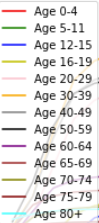

In [ ]:
six_city3 = zipdf.copy()
search = SearchEngine()
def zco(x):
    if(x != 'Unspecified'):
      city = search.by_zipcode(x).city
      return city if city else None
    return 'Unspecified'

six_city3['zipcode'] = six_city3['zipcode'].apply(zco)

six_city3 = six_city3.rename(columns={'zipcode': 'city'})

Revere3 = six_city3.loc[six_city3["city"]=="Revere"]
Revere3 = Revere3.drop(['city'], axis=1)

Chelsea3 = six_city3.loc[six_city3['city'] == 'Chelsea']
Chelsea3 = Chelsea3.drop(['city'], axis=1)

Springfield3 = six_city3.loc[six_city3["city"]=="Springfield"]
Springfield3 = Springfield3.drop(['city'], axis=1)

Everett3 = six_city3.loc[six_city3["city"]=="Everett"]
Everett3 = Everett3.drop(['city'], axis=1)

Newton3 = six_city3.loc[six_city3["city"]=="Newton"]
Newton3 = Newton3.drop(['city'], axis=1)

Wellesley3 = six_city3.loc[six_city3["city"]=="Wellesley"]
Wellesley3 = Wellesley3.drop(['city'], axis=1)

#Interpolate Data
at_least_cols = [col for col in Revere3.columns if 'one_dose' in col or 'date' in col]
Revere3 = Revere3[at_least_cols]
Revere3 = Revere3.interpolate(method ='linear', limit_direction ='both')
Revere3 = Revere3.groupby(pd.PeriodIndex(Revere3['date'], freq="M"))[[col for col in Revere3.columns if 'one_dose' in col in col]].mean()
# Revere3 = Revere3.dropna(axis = 1, thresh = Revere3.shape[0] - (Revere3.shape[0] * 0.5))

at_least_cols = [col for col in Chelsea3.columns if 'one_dose' in col or 'date' in col]
Chelsea3 = Chelsea3[at_least_cols]
Chelsea3 = Chelsea3.interpolate(method ='linear', limit_direction ='both')
Chelsea3 = Chelsea3.groupby(pd.PeriodIndex(Chelsea3['date'], freq="M"))[[col for col in Chelsea3.columns if 'one_dose' in col in col]].mean()
# Chelsea3 = Chelsea3.dropna(axis = 1, thresh = Chelsea3.shape[0] - (Chelsea3.shape[0] * 0.5))

at_least_cols = [col for col in Springfield3.columns if 'one_dose' in col or 'date' in col]
Springfield3 = Springfield3[at_least_cols]
Springfield3 = Springfield3.interpolate(method ='linear', limit_direction ='both')
Springfield3 = Springfield3.groupby(pd.PeriodIndex(Springfield3['date'], freq="M"))[[col for col in Springfield3.columns if 'one_dose' in col in col]].mean()
# Springfield3 = Springfield3.dropna(axis = 1, thresh = Springfield3.shape[0] - (Springfield3.shape[0] * 0.5))

at_least_cols = [col for col in Everett3.columns if 'one_dose' in col or 'date' in col]
Everett3 = Everett3[at_least_cols]
Everett3 = Everett3.interpolate(method ='linear', limit_direction ='both')
Everett3 = Everett3.groupby(pd.PeriodIndex(Everett3['date'], freq="M"))[[col for col in Everett3.columns if 'one_dose' in col in col]].mean()
# Everett3 = Everett3.dropna(axis = 1, thresh = Everett3.shape[0] - (Everett3.shape[0] * 0.5))

at_least_cols = [col for col in Newton3.columns if 'one_dose' in col or 'date' in col]
Newton3 = Newton3[at_least_cols]
Newton3 = Newton3.interpolate(method ='linear', limit_direction ='both')
Newton3 = Newton3.groupby(pd.PeriodIndex(Newton3['date'], freq="M"))[[col for col in Newton3.columns if 'one_dose' in col in col]].mean()
# Newton3 = Newton3.dropna(axis = 1, thresh = Newton3.shape[0] - (Newton3.shape[0] * 0.5))

at_least_cols = [col for col in Wellesley3.columns if 'one_dose' in col or 'date' in col]
Wellesley3 = Wellesley3[at_least_cols]
Wellesley3 = Wellesley3.interpolate(method ='linear', limit_direction ='both')
Wellesley3 = Wellesley3.groupby(pd.PeriodIndex(Wellesley3['date'], freq="M"))[[col for col in Wellesley3.columns if 'one_dose' in col in col]].mean()
# Wellesley3 = Wellesley3.dropna(axis = 1, thresh = Wellesley3.shape[0] - (Wellesley3.shape[0] * 0.5))




#*Normalize the Data*

In [ ]:
Revere3 = Revere3.div(Revere3.sum(axis=1), axis=0)
Chelsea3 = Chelsea3.div(Chelsea3.sum(axis=1), axis=0)
Everett2 = Everett3.div(Everett3.sum(axis=1), axis=0)
Newton3 = Newton3.div(Newton3.sum(axis=1), axis=0)
Wellesley3 = Wellesley3.div(Wellesley.sum(axis=1), axis=0)
Springfield3 = Springfield3.div(Springfield3.sum(axis=1), axis=0)

In [ ]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, sharex=True, sharey=False, figsize=(15,15))

x=[i for i in range(Revere3.shape[0])]
y=Revere3.drop(['one_dose_75+'], axis=1)
y = y.to_numpy()
labels=['Age 0-4', 'Age 5-11', 'Age 12-15', 'Age 16-19', 'Age 20-29', 'Age 30-39', 'Age 40-49', 'Age 50-59', 'Age 60-64', 'Age 65-69', 'Age 70-74', 'Age 75-79', 'Age 80+']
colors=['r','g','b','y','pink','orange','gray','black','purple','brown', 'olive','darkred','aqua','deepskyblue', 'coral']

for i in range(13):
    ax1.plot(x,y[:,i],color=colors[i],label=labels[i])

ax1.title.set_text('Revere')
ax1.xaxis.set_tick_params(labelbottom=True)
ax1.yaxis.set_tick_params(labelbottom=True)
ax1.set(xlabel='Month', ylabel='Proportion of At Least One Dose')

x=[i for i in range(Chelsea3.shape[0])]
y=Chelsea3.drop(['one_dose_75+'], axis=1)
y = y.to_numpy()

for i in range(13):
    ax2.plot(x,y[:,i],color=colors[i],label=labels[i])

ax2.title.set_text('Chelsea')
ax2.xaxis.set_tick_params(labelbottom=True)
ax2.yaxis.set_tick_params(labelbottom=True)
ax2.set(xlabel='Month', ylabel='Proportion of At Least One Dose')

x=[i for i in range(Springfield3.shape[0])]
y=Springfield3.drop(['one_dose_75+'], axis=1)
y = y.to_numpy()

for i in range(13):
    ax3.plot(x,y[:,i],color=colors[i],label=labels[i])

ax3.title.set_text('Springfield')
ax3.xaxis.set_tick_params(labelbottom=True)
ax3.yaxis.set_tick_params(labelbottom=True)
ax3.set(xlabel='Month', ylabel='Proportion of At Least One Dose')

x=[i for i in range(Everett3.shape[0])]
y=Everett3.drop(['one_dose_75+'], axis=1)
y = y.to_numpy()

for i in range(13):
    ax4.plot(x,y[:,i],color=colors[i],label=labels[i])

ax4.title.set_text('Everett')
ax4.xaxis.set_tick_params(labelbottom=True)
ax4.yaxis.set_tick_params(labelbottom=True)
ax4.set(xlabel='Month', ylabel='Proportion of At Least One Dose')

x=[i for i in range(Newton3.shape[0])]
y=Newton3.drop(['one_dose_75+'], axis=1)
y = y.to_numpy()

for i in range(13):
    ax5.plot(x,y[:,i],color=colors[i],label=labels[i])

ax5.title.set_text('Newton')
ax5.xaxis.set_tick_params(labelbottom=True)
ax5.yaxis.set_tick_params(labelbottom=True)
ax5.set(xlabel='Month', ylabel='Proportion of At Least One Dose')

x=[i for i in range(Wellesley3.shape[0])]
y=Wellesley3.drop(['one_dose_75+'], axis=1)
y = y.to_numpy()

for i in range(13):
    ax6.plot(x,y[:,i],color=colors[i],label=labels[i])

ax6.title.set_text('Wellesley')
ax6.xaxis.set_tick_params(labelbottom=True)
ax6.yaxis.set_tick_params(labelbottom=True)
ax6.set(xlabel='Month', ylabel='Proportion of At Least One Dose')

plt.suptitle("Proportion of At Least One Dose Individuals Per Month For Each City", fontsize=20)
plt.ylim([0,0.25])



# Hypothesis Test

In [ ]:
## Hypothesis: La Colaborativa site has significant influence on vaccination.
## Alternative: It doesn't.
### Since it starts the first site at March, we will focus on march and feburary to see the differnce.
## We will add six cities' data seperatly
## We will based on one_dose on last date to assume it as the total poppulation (I know it will be somehting too simple, but it will be the best way)

In [ ]:
six_city4 = zipdf.copy()
search = SearchEngine()
def zco(x):
    if(x != 'Unspecified'):
      city = search.by_zipcode(x).city
      return city if city else None
    return 'Unspecified'

six_city4['zipcode'] = six_city4['zipcode'].apply(zco)

six_city4 = six_city4.rename(columns={'zipcode': 'city'})

In [ ]:
import pandas as pd
six_city4['year']=pd.to_datetime(six_city4['date']).dt.year

In [ ]:
six_city4_2021=six_city4[six_city4['year']==2021]

In [ ]:
six_city4_2021['month']=pd.to_datetime(six_city4_2021['date']).dt.month
mar=six_city4_2021[six_city4_2021['month']==3]
mar['day']=pd.to_datetime(mar['date']).dt.day
##get index of jan 2022
six_city4_2022=six_city4[six_city4['year']==2022]
six_city4_2022['month']=pd.to_datetime(six_city4_2022['date']).dt.month
jan=six_city4_2022[six_city4_2022['month']==1] #get index of 32693


In [ ]:
period=six_city4.iloc[0:32694,:]

In [ ]:
Revere4 = period.loc[period["city"]=="Revere"]
Revere4 = Revere4.drop(['city'], axis=1)

Chelsea4 = period.loc[period['city'] == 'Chelsea']
Chelsea4 = Chelsea4.drop(['city'], axis=1)

Springfield4 = period.loc[period["city"]=="Springfield"]
Springfield4 = Springfield4.drop(['city'], axis=1)

Everett4 = period.loc[period["city"]=="Everett"]
Everett4 = Everett4.drop(['city'], axis=1)

Newton4 = period.loc[period["city"]=="Newton"]
Newton4 = Newton4.drop(['city'], axis=1)

Wellesley4 = period.loc[period["city"]=="Wellesley"]
Wellesley4 = Wellesley4.drop(['city'], axis=1)



In [ ]:
def diff(a,b):
  L=[]
  c=a/b
  for i in range(1,len(a)):
    L.append((a[i]-a[i-1]))
  return L

In [ ]:
##Now we first check for pediatric
# So compare before and after the site

##H0: There is no differnece before and after the site
##Ha: There is diffrence before and after 
## Let's focus on before age 16.
## So two groups--05 to 11 and 12 to 15.

In [ ]:
def Del(L,C):
  R=[]
  for i in range(len(L)):
    if L[i]:
      R.append(C[i])
  return R

In [ ]:
## Here we modify with the after site data
period2=six_city4.iloc[32693:54351,:] ##we will check until august
Revere5 = period2.loc[period2["city"]=="Revere"]
Revere5 = Revere5.drop(['city'], axis=1)

Chelsea5 = period2.loc[period2['city'] == 'Chelsea']
Chelsea5 = Chelsea5.drop(['city'], axis=1)

Springfield5 = period2.loc[period2["city"]=="Springfield"]
Springfield5 = Springfield5.drop(['city'], axis=1)

Everett5 = period2.loc[period2["city"]=="Everett"]
Everett5 = Everett5.drop(['city'], axis=1)

Newton5 = period2.loc[period2["city"]=="Newton"]
Newton5 = Newton5.drop(['city'], axis=1)

Wellesley5 = period2.loc[period2["city"]=="Wellesley"]
Wellesley5 = Wellesley5.drop(['city'], axis=1)

### Then look into booster
##We know that start from 2022 summer
summer=six_city4.iloc[45265:,:]
Revere6 = summer.loc[summer["city"]=="Revere"]
Revere6 = Revere6.drop(['city'], axis=1)

Chelsea6 = summer.loc[summer['city'] == 'Chelsea']
Chelsea6 = Chelsea6.drop(['city'], axis=1)

Springfield6 = summer.loc[summer["city"]=="Springfield"]
Springfield6 = Springfield6.drop(['city'], axis=1)

Everett6 = summer.loc[summer["city"]=="Everett"]
Everett6 = Everett6.drop(['city'], axis=1)

Newton6 = summer.loc[summer["city"]=="Newton"]
Newton6 = Newton6.drop(['city'], axis=1)

Wellesley6 = summer.loc[summer["city"]=="Wellesley"]
Wellesley6 = Wellesley6.drop(['city'], axis=1)




In [ ]:
def diff(a,b):
  L=[]
  c=np.divide(a,max(list(b)))
  for i in range(1,len(a)):
    L.append((c[i]-c[i-1]))
  return L

In [ ]:
Revere_after_5=Revere5['one_dose_05-11']
Revere_after_5=list(Revere_after_5)
L=np.isnan(Revere_after_5)==False
Revere_after_5=Del(L,Revere_after_5)
Revere_after_5_di=diff(Revere_after_5,Revere6['one_dose_05-11'])
Chelsea_after_5=Chelsea5['one_dose_05-11']
Chelsea_after_5=list(Chelsea_after_5)
L=np.isnan(Chelsea_after_5)==False
Chelsea_after_5=Del(L,Chelsea_after_5)
Chelsea_after_5_di=diff(Chelsea_after_5,Chelsea6['one_dose_05-11'])
Springfield_after_5=Springfield5['one_dose_05-11']
Springfield_after_5=list(Springfield_after_5)
L=np.isnan(Springfield_after_5)==False
Springfield_after_5=Del(L,Springfield_after_5)
Springfield_max=Springfield6['one_dose_05-11']
L=np.isnan(list(Springfield_max))==False
Springfield_max=Del(L,list(Springfield_max))
Springfield_after_5_di=diff(Springfield_after_5,Springfield_max)
Everett_after_5=Everett5['one_dose_05-11']
Everett_after_5=list(Everett_after_5)
L=np.isnan(Everett_after_5)==False
Everett_after_5=Del(L,Everett_after_5)
Everett_after_5_di=diff(Everett_after_5,Everett6['one_dose_05-11'])
Newton_after_5=Newton5['one_dose_05-11']
Newton_after_5=list(Newton_after_5)
L=np.isnan(Newton_after_5)==False
Newton_after_5=Del(L,Newton_after_5)
Newton_after_5_di=diff(Newton_after_5,Newton6['one_dose_05-11'])
Wellesley_after_5=Wellesley5['one_dose_05-11']
Wellesley_after_5=list(Wellesley_after_5)
L=np.isnan(Wellesley_after_5)==False
Wellesley_after_5=Del(L,Wellesley_after_5)
Wellesley_after_5_di=diff(Wellesley_after_5,Wellesley6['one_dose_05-11'])

Revere_after_12=Revere5['one_dose_12-15']
Revere_after_12=list(Revere_after_12)
L=np.isnan(Revere_after_12)==False
Revere_after_12=Del(L,Revere_after_12)
Revere_after_12_di=diff(Revere_after_12,Revere6['one_dose_12-15'])
Chelsea_after_12=Chelsea5['one_dose_12-15']
Chelsea_after_12=list(Chelsea_after_12)
L=np.isnan(Chelsea_after_12)==False
Chelsea_after_12=Del(L,Chelsea_after_12)
Chelsea_after_12_di=diff(Chelsea_after_12,Chelsea6['one_dose_12-15'])
Springfield_after_12=Springfield5['one_dose_12-15']
Springfield_after_12=list(Springfield_after_12)
L=np.isnan(Springfield_after_12)==False
Springfield_after_12=Del(L,Springfield_after_12)
Springfield_max=Springfield6['one_dose_12-15']
L=np.isnan(list(Springfield_max))==False
Springfield_max=Del(L,list(Springfield_max))
Springfield_after_12_di=diff(Springfield_after_12,Springfield_max)
Everett_after_12=Everett5['one_dose_12-15']
Everett_after_12=list(Everett_after_12)
L=np.isnan(Everett_after_12)==False
Everett_after_12=Del(L,Everett_after_12)
Everett_after_12_di=diff(Everett_after_12,Everett6['one_dose_12-15'])
Newton_after_12=Newton5['one_dose_12-15']
Newton_after_12=list(Newton_after_12)
L=np.isnan(Newton_after_12)==False
Newton_after_12=Del(L,Newton_after_12)
Newton_after_12_di=diff(Newton_after_12,Newton6['one_dose_12-15'])
Wellesley_after_12=Wellesley5['one_dose_12-15']
Wellesley_after_12=list(Wellesley_after_12)
L=np.isnan(Wellesley_after_12)==False
Wellesley_after_12=Del(L,Wellesley_after_12)
Wellesley_after_12_di=diff(Wellesley_after_12,Wellesley6['one_dose_12-15'])




In [ ]:
import scipy.stats as stats
stats.ttest_ind(Chelsea_after_5_di,Revere_after_5_di,alternative='greater')

In [ ]:
stats.ttest_ind(Chelsea_after_12_di,Revere_after_12_di,alternative='greater')

In [ ]:
print(stats.ttest_ind(Chelsea_after_5_di,Springfield_after_5_di,alternative='greater'))
print(stats.ttest_ind(Chelsea_after_5_di,Everett_after_5_di,alternative='greater'))
print(stats.ttest_ind(Chelsea_after_5_di,Newton_after_5_di,alternative='greater'))
print(stats.ttest_ind(Chelsea_after_5_di,Wellesley_after_5_di,alternative='greater'))


In [ ]:
print(stats.ttest_ind(Chelsea_after_12_di,Springfield_after_12_di,alternative='greater'))
print(stats.ttest_ind(Chelsea_after_12_di,Everett_after_12_di,alternative='greater'))
print(stats.ttest_ind(Chelsea_after_12_di,Newton_after_12_di,alternative='greater'))
print(stats.ttest_ind(Chelsea_after_12_di,Wellesley_after_12_di,alternative='greater'))




In [ ]:
### Now new hypothesis to adult.
period=six_city4.iloc[0:11778,:]
Revere4 = period.loc[period["city"]=="Revere"]
Revere4 = Revere4.drop(['city'], axis=1)

Chelsea4 = period.loc[period['city'] == 'Chelsea']
Chelsea4 = Chelsea4.drop(['city'], axis=1)

Springfield4 = period.loc[period["city"]=="Springfield"]
Springfield4 = Springfield4.drop(['city'], axis=1)

Everett4 = period.loc[period["city"]=="Everett"]
Everett4 = Everett4.drop(['city'], axis=1)

Newton4 = period.loc[period["city"]=="Newton"]
Newton4 = Newton4.drop(['city'], axis=1)

Wellesley4 = period.loc[period["city"]=="Wellesley"]
Wellesley4 = Wellesley4.drop(['city'], axis=1)

Revere4['one_dose_adult']=Revere4['one_dose_16-19']+Revere4['one_dose_20-29']+Revere4['one_dose_30-39']+Revere4['one_dose_40-49']+Revere4['one_dose_50-59']

In [ ]:
Revere4['one_dose_adult']=Revere4['one_dose_16-19']+Revere4['one_dose_20-29']+Revere4['one_dose_30-39']+Revere4['one_dose_40-49']+Revere4['one_dose_50-59']
Chelsea4['one_dose_adult']=Chelsea4['one_dose_16-19']+Chelsea4['one_dose_20-29']+Chelsea4['one_dose_30-39']+Chelsea4['one_dose_40-49']+Chelsea4['one_dose_50-59']
Springfield4['one_dose_adult']=Springfield4['one_dose_16-19']+Springfield4['one_dose_20-29']+Springfield4['one_dose_30-39']+Springfield4['one_dose_40-49']+Springfield4['one_dose_50-59']
Everett4['one_dose_adult']=Everett4['one_dose_16-19']+Everett4['one_dose_20-29']+Everett4['one_dose_30-39']+Everett4['one_dose_40-49']+Everett4['one_dose_50-59']
Newton4['one_dose_adult']=Newton4['one_dose_16-19']+Newton4['one_dose_20-29']+Newton4['one_dose_30-39']+Newton4['one_dose_40-49']+Newton4['one_dose_50-59']
Wellesley4['one_dose_adult']=Wellesley4['one_dose_16-19']+Wellesley4['one_dose_20-29']+Wellesley4['one_dose_30-39']+Wellesley4['one_dose_40-49']+Wellesley4['one_dose_50-59']
Revere6['one_dose_adult']=Revere6['one_dose_16-19']+Revere6['one_dose_20-29']+Revere6['one_dose_30-39']+Revere6['one_dose_40-49']+Revere6['one_dose_50-59']
Chelsea6['one_dose_adult']=Chelsea6['one_dose_16-19']+Chelsea6['one_dose_20-29']+Chelsea6['one_dose_30-39']+Chelsea6['one_dose_40-49']+Chelsea6['one_dose_50-59']
Springfield6['one_dose_adult']=Springfield6['one_dose_16-19']+Springfield6['one_dose_20-29']+Springfield6['one_dose_30-39']+Springfield6['one_dose_40-49']+Springfield6['one_dose_50-59']
Everett6['one_dose_adult']=Everett6['one_dose_16-19']+Everett6['one_dose_20-29']+Everett6['one_dose_30-39']+Everett6['one_dose_40-49']+Everett6['one_dose_50-59']
Newton6['one_dose_adult']=Newton6['one_dose_16-19']+Newton6['one_dose_20-29']+Newton6['one_dose_30-39']+Newton6['one_dose_40-49']+Newton6['one_dose_50-59']
Wellesley6['one_dose_adult']=Wellesley6['one_dose_16-19']+Wellesley6['one_dose_20-29']+Wellesley6['one_dose_30-39']+Wellesley6['one_dose_40-49']+Wellesley6['one_dose_50-59']




In [ ]:
Chelsea_16_19=diff(list(Chelsea4['one_dose_16-19']),Chelsea6['one_dose_16-19'])
Wellesley_16_19=diff(list(Wellesley4['one_dose_16-19']),Wellesley6['one_dose_16-19'])
L=np.isnan(Wellesley_16_19)==False
Wellesley_16_19=Del(L,Wellesley_16_19)
Revere_16_19=diff(list(Revere4['one_dose_16-19']),Revere6['one_dose_16-19'])
L=np.isnan(Revere_16_19)==False
Revere_16_19=Del(L,Revere_16_19)
Everett_16_19=diff(list(Everett4['one_dose_16-19']),Everett6['one_dose_16-19'])
L=np.isnan(Everett_16_19)==False
Everett_16_19=Del(L,Everett_16_19)
Newton_16_19=diff(list(Newton4['one_dose_16-19']),Newton6['one_dose_16-19'])
L=np.isnan(Newton_16_19)==False
Newton_16_19=Del(L,Newton_16_19)
Springfield_max=Springfield6['one_dose_16-19']
L=np.isnan(list(Springfield_max))==False
Springfield_max=Del(L,list(Springfield_max))
Springfield_16_19=diff(list(Springfield4['one_dose_16-19']),Springfield_max)
L=np.isnan(Springfield_16_19)==False
Springfield_16_19=Del(L,Springfield_16_19)




In [ ]:
print('Chelsea vs Revere in 16_19:\n',(stats.ttest_ind(Chelsea_16_19,Revere_16_19,alternative='greater')))
print('Chelsea vs Springfield in 16_19:\n',(stats.ttest_ind(Chelsea_16_19,Springfield_16_19,alternative='greater')))
print('Chelsea vs Everett in 16_19:\n',(stats.ttest_ind(Chelsea_16_19,Everett_16_19,alternative='greater')))
print('Chelsea vs Newton in 16_19:\n', (stats.ttest_ind(Chelsea_16_19,Newton_16_19,alternative='greater')))
print('Chelsea vs Wellesley in 16_19:\n', (stats.ttest_ind(Chelsea_16_19,Wellesley_16_19,alternative='greater')))


In [ ]:
Chelsea_20_29=diff(list(Chelsea4['one_dose_20-29']),Chelsea6['one_dose_20-29'])
Wellesley_20_29=diff(list(Wellesley4['one_dose_20-29']),Wellesley6['one_dose_20-29'])
L=np.isnan(Wellesley_20_29)==False
Wellesley_20_29=Del(L,Wellesley_20_29)
Revere_20_29=diff(list(Revere4['one_dose_20-29']),Revere6['one_dose_20-29'])
L=np.isnan(Revere_20_29)==False
Revere_20_29=Del(L,Revere_20_29)
Everett_20_29=diff(list(Everett4['one_dose_20-29']),Everett6['one_dose_20-29'])
L=np.isnan(Everett_20_29)==False
Everett_20_29=Del(L,Everett_20_29)
Newton_20_29=diff(list(Newton4['one_dose_20-29']),Newton6['one_dose_20-29'])
L=np.isnan(Newton_20_29)==False
Newton_20_29=Del(L,Newton_20_29)
Springfield_max=Springfield6['one_dose_20-29']
L=np.isnan(list(Springfield_max))==False
Springfield_max=Del(L,list(Springfield_max))
Springfield_20_29=diff(list(Springfield4['one_dose_20-29']),Springfield_max)
L=np.isnan(Springfield_20_29)==False
Springfield_20_29=Del(L,Springfield_20_29)

print('Chelsea vs Revere in 20_29:\n',(stats.ttest_ind(Chelsea_20_29,Revere_20_29,alternative='greater')))
print('Chelsea vs Springfield in 20_29:\n',(stats.ttest_ind(Chelsea_20_29,Springfield_20_29,alternative='greater')))
print('Chelsea vs Everett in 20_29:\n',(stats.ttest_ind(Chelsea_20_29,Everett_20_29,alternative='greater')))
print('Chelsea vs Newton in 20_29:\n', (stats.ttest_ind(Chelsea_20_29,Newton_20_29,alternative='greater')))
print('Chelsea vs Wellesley in 20_29:\n', (stats.ttest_ind(Chelsea_20_29,Wellesley_20_29,alternative='greater')))





In [ ]:
Chelsea_30_39=diff(list(Chelsea4['one_dose_30-39']),Chelsea6['one_dose_30-39'])
Wellesley_30_39=diff(list(Wellesley4['one_dose_30-39']),Wellesley6['one_dose_30-39'])
L=np.isnan(Wellesley_30_39)==False
Wellesley_30_39=Del(L,Wellesley_30_39)
Revere_30_39=diff(list(Revere4['one_dose_30-39']),Revere6['one_dose_30-39'])
L=np.isnan(Revere_30_39)==False
Revere_30_39=Del(L,Revere_30_39)
Everett_30_39=diff(list(Everett4['one_dose_30-39']),Everett6['one_dose_30-39'])
L=np.isnan(Everett_30_39)==False
Everett_30_39=Del(L,Everett_30_39)
Newton_30_39=diff(list(Newton4['one_dose_30-39']),Newton6['one_dose_30-39'])
L=np.isnan(Newton_30_39)==False
Newton_30_39=Del(L,Newton_30_39)
Springfield_max=Springfield6['one_dose_30-39']
L=np.isnan(list(Springfield_max))==False
Springfield_max=Del(L,list(Springfield_max))
Springfield_30_39=diff(list(Springfield4['one_dose_30-39']),Springfield_max)
L=np.isnan(Springfield_30_39)==False
Springfield_30_39=Del(L,Springfield_30_39)

print('Chelsea vs Revere in 30_39:\n',(stats.ttest_ind(Chelsea_30_39,Revere_30_39,alternative='greater')))
print('Chelsea vs Springfield in 30_39:\n',(stats.ttest_ind(Chelsea_30_39,Springfield_30_39,alternative='greater')))
print('Chelsea vs Everett in 30_39:\n',(stats.ttest_ind(Chelsea_30_39,Everett_30_39,alternative='greater')))
print('Chelsea vs Newton in 30_39:\n', (stats.ttest_ind(Chelsea_30_39,Newton_30_39,alternative='greater')))
print('Chelsea vs Wellesley in 30_39:\n', (stats.ttest_ind(Chelsea_30_39,Wellesley_30_39,alternative='greater')))





In [ ]:
Chelsea_40_49=diff(list(Chelsea4['one_dose_40-49']),Chelsea6['one_dose_40-49'])
Wellesley_40_49=diff(list(Wellesley4['one_dose_40-49']),Wellesley6['one_dose_40-49'])
L=np.isnan(Wellesley_40_49)==False
Wellesley_40_49=Del(L,Wellesley_40_49)
Revere_40_49=diff(list(Revere4['one_dose_40-49']),Revere6['one_dose_40-49'])
L=np.isnan(Revere_40_49)==False
Revere_40_49=Del(L,Revere_40_49)
Everett_40_49=diff(list(Everett4['one_dose_40-49']),Everett6['one_dose_40-49'])
L=np.isnan(Everett_40_49)==False
Everett_40_49=Del(L,Everett_40_49)
Newton_40_49=diff(list(Newton4['one_dose_40-49']),Newton6['one_dose_40-49'])
L=np.isnan(Newton_40_49)==False
Newton_40_49=Del(L,Newton_40_49)
Springfield_max=Springfield6['one_dose_40-49']
L=np.isnan(list(Springfield_max))==False
Springfield_max=Del(L,list(Springfield_max))
Springfield_40_49=diff(list(Springfield4['one_dose_40-49']),Springfield_max)
L=np.isnan(Springfield_40_49)==False
Springfield_40_49=Del(L,Springfield_40_49)

print('Chelsea vs Revere in 40_49:\n',(stats.ttest_ind(Chelsea_40_49,Revere_40_49,alternative='greater')))
print('Chelsea vs Springfield in 40_49:\n',(stats.ttest_ind(Chelsea_40_49,Springfield_40_49,alternative='greater')))
print('Chelsea vs Everett in 40_49:\n',(stats.ttest_ind(Chelsea_40_49,Everett_40_49,alternative='greater')))
print('Chelsea vs Newton in 40_49:\n', (stats.ttest_ind(Chelsea_40_49,Newton_40_49,alternative='greater')))
print('Chelsea vs Wellesley in 40_49:\n', (stats.ttest_ind(Chelsea_40_49,Wellesley_40_49,alternative='greater')))





In [ ]:
Chelsea_50_59=diff(list(Chelsea4['one_dose_50-59']),Chelsea6['one_dose_50-59'])
Wellesley_50_59=diff(list(Wellesley4['one_dose_50-59']),Wellesley6['one_dose_50-59'])
L=np.isnan(Wellesley_50_59)==False
Wellesley_50_59=Del(L,Wellesley_50_59)
Revere_50_59=diff(list(Revere4['one_dose_50-59']),Revere6['one_dose_50-59'])
L=np.isnan(Revere_50_59)==False
Revere_50_59=Del(L,Revere_50_59)
Everett_50_59=diff(list(Everett4['one_dose_50-59']),Everett6['one_dose_50-59'])
L=np.isnan(Everett_50_59)==False
Everett_50_59=Del(L,Everett_50_59)
Newton_50_59=diff(list(Newton4['one_dose_50-59']),Newton6['one_dose_50-59'])
L=np.isnan(Newton_50_59)==False
Newton_50_59=Del(L,Newton_50_59)
Springfield_max=Springfield6['one_dose_50-59']
L=np.isnan(list(Springfield_max))==False
Springfield_max=Del(L,list(Springfield_max))
Springfield_50_59=diff(list(Springfield4['one_dose_50-59']),Springfield_max)
L=np.isnan(Springfield_50_59)==False
Springfield_50_59=Del(L,Springfield_50_59)

print('Chelsea vs Revere in 50_59:\n',(stats.ttest_ind(Chelsea_50_59,Revere_50_59,alternative='greater')))
print('Chelsea vs Springfield in 50_59:\n',(stats.ttest_ind(Chelsea_50_59,Springfield_50_59,alternative='greater')))
print('Chelsea vs Everett in 50_59:\n',(stats.ttest_ind(Chelsea_50_59,Everett_50_59,alternative='greater')))
print('Chelsea vs Newton in 50_59:\n', (stats.ttest_ind(Chelsea_50_59,Newton_50_59,alternative='greater')))
print('Chelsea vs Wellesley in 50_59:\n', (stats.ttest_ind(Chelsea_50_59,Wellesley_50_59,alternative='greater')))





In [ ]:
Chelsea_60_64=diff(list(Chelsea4['one_dose_60-64']),Chelsea6['one_dose_60-64'])
Wellesley_60_64=diff(list(Wellesley4['one_dose_60-64']),Wellesley6['one_dose_60-64'])
L=np.isnan(Wellesley_60_64)==False
Wellesley_60_64=Del(L,Wellesley_60_64)
Revere_60_64=diff(list(Revere4['one_dose_60-64']),Revere6['one_dose_60-64'])
L=np.isnan(Revere_60_64)==False
Revere_60_64=Del(L,Revere_60_64)
Everett_60_64=diff(list(Everett4['one_dose_60-64']),Everett6['one_dose_60-64'])
L=np.isnan(Everett_60_64)==False
Everett_60_64=Del(L,Everett_60_64)
Newton_60_64=diff(list(Newton4['one_dose_60-64']),Newton6['one_dose_60-64'])
L=np.isnan(Newton_60_64)==False
Newton_60_64=Del(L,Newton_60_64)
Springfield_max=Springfield6['one_dose_60-64']
L=np.isnan(list(Springfield_max))==False
Springfield_max=Del(L,list(Springfield_max))
Springfield_60_64=diff(list(Springfield4['one_dose_60-64']),Springfield_max)
L=np.isnan(Springfield_60_64)==False
Springfield_60_64=Del(L,Springfield_60_64)

print('Chelsea vs Revere in 60_64:\n',(stats.ttest_ind(Chelsea_60_64,Revere_60_64,alternative='greater')))
print('Chelsea vs Springfield in 60_64:\n',(stats.ttest_ind(Chelsea_60_64,Springfield_60_64,alternative='greater')))
print('Chelsea vs Everett in 60_64:\n',(stats.ttest_ind(Chelsea_60_64,Everett_60_64,alternative='greater')))
print('Chelsea vs Newton in 60_64:\n', (stats.ttest_ind(Chelsea_60_64,Newton_60_64,alternative='greater')))
print('Chelsea vs Wellesley in 60_64:\n', (stats.ttest_ind(Chelsea_60_64,Wellesley_60_64,alternative='greater')))





In [ ]:
Chelsea_65_69=diff(list(Chelsea4['one_dose_65-69']),Chelsea6['one_dose_65-69'])
Wellesley_65_69=diff(list(Wellesley4['one_dose_65-69']),Wellesley6['one_dose_65-69'])
L=np.isnan(Wellesley_65_69)==False
Wellesley_65_69=Del(L,Wellesley_65_69)
Revere_65_69=diff(list(Revere4['one_dose_65-69']),Revere6['one_dose_65-69'])
L=np.isnan(Revere_65_69)==False
Revere_65_69=Del(L,Revere_65_69)
Everett_65_69=diff(list(Everett4['one_dose_65-69']),Everett6['one_dose_65-69'])
L=np.isnan(Everett_65_69)==False
Everett_65_69=Del(L,Everett_65_69)
Newton_65_69=diff(list(Newton4['one_dose_65-69']),Newton6['one_dose_65-69'])
L=np.isnan(Newton_65_69)==False
Newton_65_69=Del(L,Newton_65_69)
Springfield_max=Springfield6['one_dose_65-69']
L=np.isnan(list(Springfield_max))==False
Springfield_max=Del(L,list(Springfield_max))
Springfield_65_69=diff(list(Springfield4['one_dose_65-69']),Springfield_max)
L=np.isnan(Springfield_65_69)==False
Springfield_65_69=Del(L,Springfield_65_69)

print('Chelsea vs Revere in 65_69:\n',(stats.ttest_ind(Chelsea_65_69,Revere_65_69,alternative='greater')))
print('Chelsea vs Springfield in 65_69:\n',(stats.ttest_ind(Chelsea_65_69,Springfield_65_69,alternative='greater')))
print('Chelsea vs Everett in 65_69:\n',(stats.ttest_ind(Chelsea_65_69,Everett_65_69,alternative='greater')))
print('Chelsea vs Newton in 65_69:\n', (stats.ttest_ind(Chelsea_65_69,Newton_65_69,alternative='greater')))
print('Chelsea vs Wellesley in 65_69:\n', (stats.ttest_ind(Chelsea_65_69,Wellesley_65_69,alternative='greater')))





In [ ]:
Chelsea_70_74=diff(list(Chelsea4['one_dose_70-74']),Chelsea6['one_dose_70-74'])
Wellesley_70_74=diff(list(Wellesley4['one_dose_70-74']),Wellesley6['one_dose_70-74'])
L=np.isnan(Wellesley_70_74)==False
Wellesley_70_74=Del(L,Wellesley_70_74)
Revere_70_74=diff(list(Revere4['one_dose_70-74']),Revere6['one_dose_70-74'])
L=np.isnan(Revere_70_74)==False
Revere_70_74=Del(L,Revere_70_74)
Everett_70_74=diff(list(Everett4['one_dose_70-74']),Everett6['one_dose_70-74'])
L=np.isnan(Everett_70_74)==False
Everett_70_74=Del(L,Everett_70_74)
Newton_70_74=diff(list(Newton4['one_dose_70-74']),Newton6['one_dose_70-74'])
L=np.isnan(Newton_70_74)==False
Newton_70_74=Del(L,Newton_70_74)
Springfield_max=Springfield6['one_dose_70-74']
L=np.isnan(list(Springfield_max))==False
Springfield_max=Del(L,list(Springfield_max))
Springfield_70_74=diff(list(Springfield4['one_dose_70-74']),Springfield_max)
L=np.isnan(Springfield_70_74)==False
Springfield_70_74=Del(L,Springfield_70_74)

print('Chelsea vs Revere in 70_74:\n',(stats.ttest_ind(Chelsea_70_74,Revere_70_74,alternative='greater')))
print('Chelsea vs Springfield in 70_74:\n',(stats.ttest_ind(Chelsea_70_74,Springfield_70_74,alternative='greater')))
print('Chelsea vs Everett in 70_74:\n',(stats.ttest_ind(Chelsea_70_74,Everett_70_74,alternative='greater')))
print('Chelsea vs Newton in 70_74:\n', (stats.ttest_ind(Chelsea_70_74,Newton_70_74,alternative='greater')))
print('Chelsea vs Wellesley in 70_74:\n', (stats.ttest_ind(Chelsea_70_74,Wellesley_70_74,alternative='greater')))





In [ ]:
Chelsea_75=diff(list(Chelsea4['one_dose_75+']),Chelsea6['one_dose_75+'])
Wellesley_75=diff(list(Wellesley4['one_dose_75+']),Wellesley6['one_dose_75+'])
L=np.isnan(Wellesley_75)==False
Wellesley_75=Del(L,Wellesley_75)
Revere_75=diff(list(Revere4['one_dose_75+']),Revere6['one_dose_75+'])
L=np.isnan(Revere_75)==False
Revere_75=Del(L,Revere_75)
Everett_75=diff(list(Everett4['one_dose_75+']),Everett6['one_dose_75+'])
L=np.isnan(Everett_75)==False
Everett_75=Del(L,Everett_75)
Newton_75=diff(list(Newton4['one_dose_75+']),Newton6['one_dose_75+'])
L=np.isnan(Newton_75)==False
Newton_75=Del(L,Newton_75)
Springfield_max=Springfield6['one_dose_75+']
L=np.isnan(list(Springfield_max))==False
Springfield_max=Del(L,list(Springfield_max))
Springfield_75=diff(list(Springfield4['one_dose_75+']),Springfield_max)
L=np.isnan(Springfield_75)==False
Springfield_75=Del(L,Springfield_75)

print('Chelsea vs Revere in 75:\n',(stats.ttest_ind(Chelsea_75,Revere_75,alternative='greater')))
print('Chelsea vs Springfield in 75:\n',(stats.ttest_ind(Chelsea_75,Springfield_75,alternative='greater')))
print('Chelsea vs Everett in 75:\n',(stats.ttest_ind(Chelsea_75,Everett_75,alternative='greater')))
print('Chelsea vs Newton in 75:\n', (stats.ttest_ind(Chelsea_75,Newton_75,alternative='greater')))
print('Chelsea vs Wellesley in 75:\n', (stats.ttest_ind(Chelsea_75,Wellesley_75,alternative='greater')))





In [ ]:
### Then look into booster
##We know that start from 2022 summer
summer=six_city4.iloc[45265:,:]
Revere6 = summer.loc[summer["city"]=="Revere"]
Revere6 = Revere6.drop(['city'], axis=1)

Chelsea6 = summer.loc[summer['city'] == 'Chelsea']
Chelsea6 = Chelsea6.drop(['city'], axis=1)

Springfield6 = summer.loc[summer["city"]=="Springfield"]
Springfield6 = Springfield6.drop(['city'], axis=1)

Everett6 = summer.loc[summer["city"]=="Everett"]
Everett6 = Everett6.drop(['city'], axis=1)

Newton6 = summer.loc[summer["city"]=="Newton"]
Newton6 = Newton6.drop(['city'], axis=1)

Wellesley6 = summer.loc[summer["city"]=="Wellesley"]
Wellesley6 = Wellesley6.drop(['city'], axis=1)




In [ ]:
Revere6['boosted_adult']=Revere6['boosted_16-19']+Revere6['boosted_20-29']+Revere6['boosted_30-39']+Revere6['boosted_40-49']+Revere6['boosted_50-59']
Chelsea6['boosted_adult']=Chelsea6['boosted_16-19']+Chelsea6['boosted_20-29']+Chelsea6['boosted_30-39']+Chelsea6['boosted_40-49']+Chelsea6['boosted_50-59']
Springfield6['boosted_adult']=Springfield6['boosted_16-19']+Springfield6['boosted_20-29']+Springfield6['boosted_30-39']+Springfield6['boosted_40-49']+Springfield6['boosted_50-59']
Everett6['boosted_adult']=Everett6['boosted_16-19']+Everett6['boosted_20-29']+Everett6['boosted_30-39']+Everett6['boosted_40-49']+Everett6['boosted_50-59']
Newton6['boosted_adult']=Newton6['boosted_16-19']+Newton6['boosted_20-29']+Newton6['boosted_30-39']+Newton6['boosted_40-49']+Newton6['boosted_50-59']
Wellesley6['boosted_adult']=Wellesley6['boosted_16-19']+Wellesley6['boosted_20-29']+Wellesley6['boosted_30-39']+Wellesley6['boosted_40-49']+Wellesley6['boosted_50-59']

In [ ]:
Chelsea_16_19=diff(list(Chelsea6['boosted_16-19']),Chelsea6['boosted_16-19'])
Wellesley_16_19=diff(list(Wellesley6['boosted_16-19']),Wellesley6['boosted_16-19'])
L=np.isnan(Wellesley_16_19)==False
Wellesley_16_19=Del(L,Wellesley_16_19)
Revere_16_19=diff(list(Revere6['boosted_16-19']),Revere6['boosted_16-19'])
L=np.isnan(Revere_16_19)==False
Revere_16_19=Del(L,Revere_16_19)
Everett_16_19=diff(list(Everett6['boosted_16-19']),Everett6['boosted_16-19'])
L=np.isnan(Everett_16_19)==False
Everett_16_19=Del(L,Everett_16_19)
Newton_16_19=diff(list(Newton6['boosted_16-19']),Newton6['boosted_16-19'])
L=np.isnan(Newton_16_19)==False
Newton_16_19=Del(L,Newton_16_19)
Springfield_max=Springfield6['boosted_16-19']
L=np.isnan(list(Springfield_max))==False
Springfield_max=Del(L,list(Springfield_max))
Springfield_16_19=diff(list(Springfield6['boosted_16-19']),Springfield_max)
L=np.isnan(Springfield_16_19)==False
Springfield_16_19=Del(L,Springfield_16_19)

print('Chelsea vs Revere in 16_19:\n',stats.ttest_ind(Chelsea_16_19,Revere_16_19,alternative='greater'))
print('Chelsea vs Revere in 16_19:\n',stats.ttest_ind(Chelsea_16_19,Springfield_16_19,alternative='greater'))
print('Chelsea vs Revere in 16_19:\n',stats.ttest_ind(Chelsea_16_19,Everett_16_19,alternative='greater'))
print('Chelsea vs Revere in 16_19:\n',stats.ttest_ind(Chelsea_16_19,Newton_16_19,alternative='greater'))
print('Chelsea vs Revere in 16_19:\n',stats.ttest_ind(Chelsea_16_19,Wellesley_16_19,alternative='greater'))




In [ ]:
Chelsea_20_29=diff(list(Chelsea6['boosted_20-29']),Chelsea6['boosted_20-29'])
Wellesley_20_29=diff(list(Wellesley6['boosted_20-29']),Wellesley6['boosted_20-29'])
L=np.isnan(Wellesley_20_29)==False
Wellesley_20_29=Del(L,Wellesley_20_29)
Revere_20_29=diff(list(Revere6['boosted_20-29']),Revere6['boosted_20-29'])
L=np.isnan(Revere_20_29)==False
Revere_20_29=Del(L,Revere_20_29)
Everett_20_29=diff(list(Everett6['boosted_20-29']),Everett6['boosted_20-29'])
L=np.isnan(Everett_20_29)==False
Everett_20_29=Del(L,Everett_20_29)
Newton_20_29=diff(list(Newton6['boosted_20-29']),Newton6['boosted_20-29'])
L=np.isnan(Newton_20_29)==False
Newton_20_29=Del(L,Newton_20_29)
Springfield_max=Springfield6['boosted_20-29']
L=np.isnan(list(Springfield_max))==False
Springfield_max=Del(L,list(Springfield_max))
Springfield_20_29=diff(list(Springfield6['boosted_20-29']),Springfield_max)
L=np.isnan(Springfield_20_29)==False
Springfield_20_29=Del(L,Springfield_20_29)

print('Chelsea vs Revere in 20_29:\n',stats.ttest_ind(Chelsea_20_29,Revere_20_29,alternative='greater'))
print('Chelsea vs Revere in 20_29:\n',stats.ttest_ind(Chelsea_20_29,Springfield_20_29,alternative='greater'))
print('Chelsea vs Revere in 20_29:\n',stats.ttest_ind(Chelsea_20_29,Everett_20_29,alternative='greater'))
print('Chelsea vs Revere in 20_29:\n',stats.ttest_ind(Chelsea_20_29,Newton_20_29,alternative='greater'))
print('Chelsea vs Revere in 20_29:\n',stats.ttest_ind(Chelsea_20_29,Wellesley_20_29,alternative='greater'))







In [ ]:
Chelsea_30_39=diff(list(Chelsea6['boosted_30-39']),Chelsea6['boosted_30-39'])
Wellesley_30_39=diff(list(Wellesley6['boosted_30-39']),Wellesley6['boosted_30-39'])
L=np.isnan(Wellesley_30_39)==False
Wellesley_30_39=Del(L,Wellesley_30_39)
Revere_30_39=diff(list(Revere6['boosted_30-39']),Revere6['boosted_30-39'])
L=np.isnan(Revere_30_39)==False
Revere_30_39=Del(L,Revere_30_39)
Everett_30_39=diff(list(Everett6['boosted_30-39']),Everett6['boosted_30-39'])
L=np.isnan(Everett_30_39)==False
Everett_30_39=Del(L,Everett_30_39)
Newton_30_39=diff(list(Newton6['boosted_30-39']),Newton6['boosted_30-39'])
L=np.isnan(Newton_30_39)==False
Newton_30_39=Del(L,Newton_30_39)
Springfield_max=Springfield6['boosted_30-39']
L=np.isnan(list(Springfield_max))==False
Springfield_max=Del(L,list(Springfield_max))
Springfield_30_39=diff(list(Springfield6['boosted_30-39']),Springfield_max)
L=np.isnan(Springfield_30_39)==False
Springfield_30_39=Del(L,Springfield_30_39)

print('Chelsea vs Revere in 30_39:\n',stats.ttest_ind(Chelsea_30_39,Revere_30_39,alternative='greater'))
print('Chelsea vs Revere in 30_39:\n',stats.ttest_ind(Chelsea_30_39,Springfield_30_39,alternative='greater'))
print('Chelsea vs Revere in 30_39:\n',stats.ttest_ind(Chelsea_30_39,Everett_30_39,alternative='greater'))
print('Chelsea vs Revere in 30_39:\n',stats.ttest_ind(Chelsea_30_39,Newton_30_39,alternative='greater'))
print('Chelsea vs Revere in 30_39:\n',stats.ttest_ind(Chelsea_30_39,Wellesley_30_39,alternative='greater'))






In [ ]:
Chelsea_40_49=diff(list(Chelsea6['boosted_40-49']),Chelsea6['boosted_40-49'])
Wellesley_40_49=diff(list(Wellesley6['boosted_40-49']),Wellesley6['boosted_40-49'])
L=np.isnan(Wellesley_40_49)==False
Wellesley_40_49=Del(L,Wellesley_40_49)
Revere_40_49=diff(list(Revere6['boosted_40-49']),Revere6['boosted_40-49'])
L=np.isnan(Revere_40_49)==False
Revere_40_49=Del(L,Revere_40_49)
Everett_40_49=diff(list(Everett6['boosted_40-49']),Everett6['boosted_40-49'])
L=np.isnan(Everett_40_49)==False
Everett_40_49=Del(L,Everett_40_49)
Newton_40_49=diff(list(Newton6['boosted_40-49']),Newton6['boosted_40-49'])
L=np.isnan(Newton_40_49)==False
Newton_40_49=Del(L,Newton_40_49)
Springfield_max=Springfield6['boosted_40-49']
L=np.isnan(list(Springfield_max))==False
Springfield_max=Del(L,list(Springfield_max))
Springfield_40_49=diff(list(Springfield6['boosted_40-49']),Springfield_max)
L=np.isnan(Springfield_40_49)==False
Springfield_40_49=Del(L,Springfield_40_49)

print('Chelsea vs Revere in 40_49:\n',stats.ttest_ind(Chelsea_40_49,Revere_40_49,alternative='greater'))
print('Chelsea vs Revere in 40_49:\n',stats.ttest_ind(Chelsea_40_49,Springfield_40_49,alternative='greater'))
print('Chelsea vs Revere in 40_49:\n',stats.ttest_ind(Chelsea_40_49,Everett_40_49,alternative='greater'))
print('Chelsea vs Revere in 40_49:\n',stats.ttest_ind(Chelsea_40_49,Newton_40_49,alternative='greater'))
print('Chelsea vs Revere in 40_49:\n',stats.ttest_ind(Chelsea_40_49,Wellesley_40_49,alternative='greater'))




In [ ]:
Chelsea_50_59=diff(list(Chelsea6['boosted_50-59']),Chelsea6['boosted_50-59'])
Wellesley_50_59=diff(list(Wellesley6['boosted_50-59']),Wellesley6['boosted_50-59'])
L=np.isnan(Wellesley_50_59)==False
Wellesley_50_59=Del(L,Wellesley_50_59)
Revere_50_59=diff(list(Revere6['boosted_50-59']),Revere6['boosted_50-59'])
L=np.isnan(Revere_50_59)==False
Revere_50_59=Del(L,Revere_50_59)
Everett_50_59=diff(list(Everett6['boosted_50-59']),Everett6['boosted_50-59'])
L=np.isnan(Everett_50_59)==False
Everett_50_59=Del(L,Everett_50_59)
Newton_50_59=diff(list(Newton6['boosted_50-59']),Newton6['boosted_50-59'])
L=np.isnan(Newton_50_59)==False
Newton_50_59=Del(L,Newton_50_59)
Springfield_max=Springfield6['boosted_50-59']
L=np.isnan(list(Springfield_max))==False
Springfield_max=Del(L,list(Springfield_max))
Springfield_50_59=diff(list(Springfield6['boosted_50-59']),Springfield_max)
L=np.isnan(Springfield_50_59)==False
Springfield_50_59=Del(L,Springfield_50_59)
print('Chelsea vs Revere in 50_59:\n',stats.ttest_ind(Chelsea_50_59,Revere_50_59,alternative='greater'))
print('Chelsea vs Revere in 50_59:\n',stats.ttest_ind(Chelsea_50_59,Springfield_50_59,alternative='greater'))
print('Chelsea vs Revere in 50_59:\n',stats.ttest_ind(Chelsea_50_59,Everett_50_59,alternative='greater'))
print('Chelsea vs Revere in 50_59:\n',stats.ttest_ind(Chelsea_50_59,Newton_50_59,alternative='greater'))
print('Chelsea vs Revere in 50_59:\n',stats.ttest_ind(Chelsea_50_59,Wellesley_50_59,alternative='greater'))






In [ ]:
Chelsea_60_64=diff(list(Chelsea6['boosted_60-64']),Chelsea6['boosted_60-64'])
Wellesley_60_64=diff(list(Wellesley6['boosted_60-64']),Wellesley6['boosted_60-64'])
L=np.isnan(Wellesley_60_64)==False
Wellesley_60_64=Del(L,Wellesley_60_64)
Revere_60_64=diff(list(Revere6['boosted_60-64']),Revere6['boosted_60-64'])
L=np.isnan(Revere_60_64)==False
Revere_60_64=Del(L,Revere_60_64)
Everett_60_64=diff(list(Everett6['boosted_60-64']),Everett6['boosted_60-64'])
L=np.isnan(Everett_60_64)==False
Everett_60_64=Del(L,Everett_60_64)
Newton_60_64=diff(list(Newton6['boosted_60-64']),Newton6['boosted_60-64'])
L=np.isnan(Newton_60_64)==False
Newton_60_64=Del(L,Newton_60_64)
Springfield_max=Springfield6['boosted_60-64']
L=np.isnan(list(Springfield_max))==False
Springfield_max=Del(L,list(Springfield_max))
Springfield_60_64=diff(list(Springfield6['boosted_60-64']),Springfield_max)
L=np.isnan(Springfield_60_64)==False
Springfield_60_64=Del(L,Springfield_60_64)
print('Chelsea vs Revere in 60_64:\n',stats.ttest_ind(Chelsea_60_64,Revere_60_64,alternative='greater'))
print('Chelsea vs Revere in 60_64:\n',stats.ttest_ind(Chelsea_60_64,Springfield_60_64,alternative='greater'))
print('Chelsea vs Revere in 60_64:\n',stats.ttest_ind(Chelsea_60_64,Everett_60_64,alternative='greater'))
print('Chelsea vs Revere in 60_64:\n',stats.ttest_ind(Chelsea_60_64,Newton_60_64,alternative='greater'))
print('Chelsea vs Revere in 60_64:\n',stats.ttest_ind(Chelsea_60_64,Wellesley_60_64,alternative='greater'))







In [ ]:
Chelsea_65_69=diff(list(Chelsea6['boosted_65-69']),Chelsea6['boosted_65-69'])
Wellesley_65_69=diff(list(Wellesley6['boosted_65-69']),Wellesley6['boosted_65-69'])
L=np.isnan(Wellesley_65_69)==False
Wellesley_65_69=Del(L,Wellesley_65_69)
Revere_65_69=diff(list(Revere6['boosted_65-69']),Revere6['boosted_65-69'])
L=np.isnan(Revere_65_69)==False
Revere_65_69=Del(L,Revere_65_69)
Everett_65_69=diff(list(Everett6['boosted_65-69']),Everett6['boosted_65-69'])
L=np.isnan(Everett_65_69)==False
Everett_65_69=Del(L,Everett_65_69)
Newton_65_69=diff(list(Newton6['boosted_65-69']),Newton6['boosted_65-69'])
L=np.isnan(Newton_65_69)==False
Newton_65_69=Del(L,Newton_65_69)
Springfield_max=Springfield6['boosted_65-69']
L=np.isnan(list(Springfield_max))==False
Springfield_max=Del(L,list(Springfield_max))
Springfield_65_69=diff(list(Springfield6['boosted_65-69']),Springfield_max)
L=np.isnan(Springfield_65_69)==False
Springfield_65_69=Del(L,Springfield_65_69)
print('Chelsea vs Revere in 65_69:\n',stats.ttest_ind(Chelsea_65_69,Revere_65_69,alternative='greater'))
print('Chelsea vs Revere in 65_69:\n',stats.ttest_ind(Chelsea_65_69,Springfield_65_69,alternative='greater'))
print('Chelsea vs Revere in 65_69:\n',stats.ttest_ind(Chelsea_65_69,Everett_65_69,alternative='greater'))
print('Chelsea vs Revere in 65_69:\n',stats.ttest_ind(Chelsea_65_69,Newton_65_69,alternative='greater'))
print('Chelsea vs Revere in 65_69:\n',stats.ttest_ind(Chelsea_65_69,Wellesley_65_69,alternative='greater'))







In [ ]:
Chelsea_65_69=diff(list(Chelsea6['boosted_65-69']),Chelsea6['boosted_65-69'])
Wellesley_65_69=diff(list(Wellesley6['boosted_65-69']),Wellesley6['boosted_65-69'])
L=np.isnan(Wellesley_65_69)==False
Wellesley_65_69=Del(L,Wellesley_65_69)
Revere_65_69=diff(list(Revere6['boosted_65-69']),Revere6['boosted_65-69'])
L=np.isnan(Revere_65_69)==False
Revere_65_69=Del(L,Revere_65_69)
Everett_65_69=diff(list(Everett6['boosted_65-69']),Everett6['boosted_65-69'])
L=np.isnan(Everett_65_69)==False
Everett_65_69=Del(L,Everett_65_69)
Newton_65_69=diff(list(Newton6['boosted_65-69']),Newton6['boosted_65-69'])
L=np.isnan(Newton_65_69)==False
Newton_65_69=Del(L,Newton_65_69)
Springfield_max=Springfield6['boosted_65-69']
L=np.isnan(list(Springfield_max))==False
Springfield_max=Del(L,list(Springfield_max))
Springfield_65_69=diff(list(Springfield6['boosted_65-69']),Springfield_max)
L=np.isnan(Springfield_65_69)==False
Springfield_65_69=Del(L,Springfield_65_69)
print('Chelsea vs Revere in 65_69:\n',stats.ttest_ind(Chelsea_65_69,Revere_65_69,alternative='greater'))
print('Chelsea vs Revere in 65_69:\n',stats.ttest_ind(Chelsea_65_69,Springfield_65_69,alternative='greater'))
print('Chelsea vs Revere in 65_69:\n',stats.ttest_ind(Chelsea_65_69,Everett_65_69,alternative='greater'))
print('Chelsea vs Revere in 65_69:\n',stats.ttest_ind(Chelsea_65_69,Newton_65_69,alternative='greater'))
print('Chelsea vs Revere in 65_69:\n',stats.ttest_ind(Chelsea_65_69,Wellesley_65_69,alternative='greater'))







In [ ]:
Chelsea_75=diff(list(Chelsea6['boosted_75+']),Chelsea6['boosted_75+'])
Wellesley_75=diff(list(Wellesley6['boosted_75+']),Wellesley6['boosted_75+'])
L=np.isnan(Wellesley_75)==False
Wellesley_75=Del(L,Wellesley_75)
Revere_75=diff(list(Revere6['boosted_75+']),Revere6['boosted_75+'])
L=np.isnan(Revere_75)==False
Revere_75=Del(L,Revere_75)
Everett_75=diff(list(Everett6['boosted_75+']),Everett6['boosted_75+'])
L=np.isnan(Everett_75)==False
Everett_75=Del(L,Everett_75)
Newton_75=diff(list(Newton6['boosted_75+']),Newton6['boosted_75+'])
L=np.isnan(Newton_75)==False
Newton_75=Del(L,Newton_75)
Springfield_max=Springfield6['boosted_75+']
L=np.isnan(list(Springfield_max))==False
Springfield_max=Del(L,list(Springfield_max))
Springfield_75=diff(list(Springfield6['boosted_75+']),Springfield_max)
L=np.isnan(Springfield_75)==False
Springfield_75=Del(L,Springfield_75)
print('Chelsea vs Revere in 75:\n',stats.ttest_ind(Chelsea_75,Revere_75,alternative='greater'))
print('Chelsea vs Revere in 75:\n',stats.ttest_ind(Chelsea_75,Springfield_75,alternative='greater'))
print('Chelsea vs Revere in 75:\n',stats.ttest_ind(Chelsea_75,Everett_75,alternative='greater'))
print('Chelsea vs Revere in 75:\n',stats.ttest_ind(Chelsea_75,Newton_75,alternative='greater'))
print('Chelsea vs Revere in 75:\n',stats.ttest_ind(Chelsea_75,Wellesley_75,alternative='greater'))





